In [1]:
import yfinance as yf
import pandas as pd
from ctw2 import CTW
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binomtest

## **PREP**

In [2]:
%matplotlib inline

In [3]:
# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2023-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
df.head(20)

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2019-09-10  2979.389893  2979.389893  2957.010010  2971.010010  4393040000
2019-09-11  3000.929932  3000.929932  2975.310059  2981.409912  3934370000
2019-09-12  3009.570068  3020.739990  3000.919922  3009.080078  3796990000
2019-09-13  3007.389893  3017.330078  3002.899902  3012.209961  3557010000
2019-09-16  2997.959961  3002.189941  2990.669922  2996.409912  4285860000
2019-09-17  3005.699951  3006.209961  2993.729980  2995.669922  3673250000
2019-09-18  3006.729980  3007.830078  2978.570068  3001.500000  3458800000
2019-09-19  3006.790039  3021.989990  3003.159912  3010.360107  3265660000
2019-09-20  2992.070068  3016.370117  2984.679932  3008.419922  6103440000
2019-09-23  2991.780029  2999.149902  2982.229980  2983.500000  3187250000
2019-09-24  2966.600098  3007.979980  2957.729980  3002.429932  3872800000
2019-09-25  2984.870117  2989.820068  2952.860107  2968.350098  3331200000
2019-09-26  2977.620117  2987.280029  2963.709961  2985.729980  3084910000
2019-09-27  2961.790039  2987.310059  2945.530029  2985.469971  3246480000
2019-09-30  2976.739990  2983.850098  2967.070068  2967.070068  3249130000
2019-10-01  2940.250000  2992.530029  2938.699951  2983.689941  3560750000
2019-10-02  2887.610107  2924.780029  2874.929932  2924.780029  3914180000
2019-10-03  2910.629883  2911.129883  2855.939941  2885.379883  3515130000
2019-10-04  2952.010010  2953.739990  2918.560059  2918.560059  3005600000
2019-10-07  2938.790039  2959.750000  2935.679932  2944.229980  2959050000

In [5]:
df.columns

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

# **EDA**

[*********************100%***********************]  1 of 1 completed


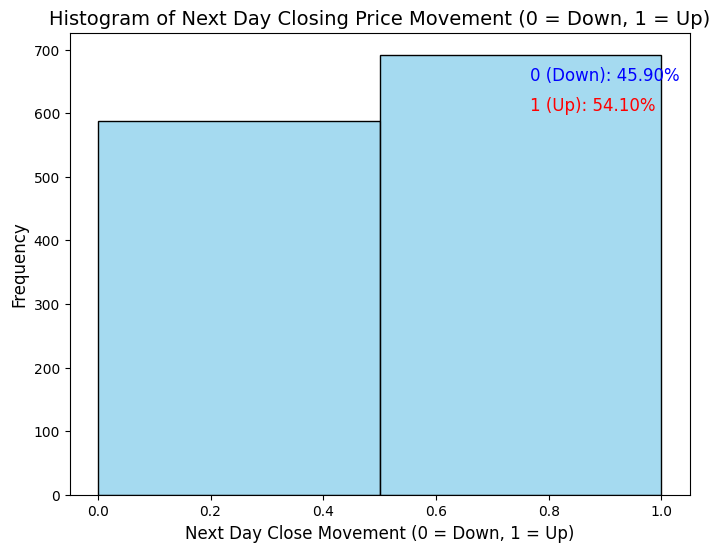

Mean: 0.54 (Proportion of 1's: 54.10%)
Standard Deviation: 0.50
Count of 0's (Down): 587
Count of 1's (Up): 692


In [6]:
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

# Add the 'Next_Close_Higher' column (binary classification target)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Next_Close_Higher'], bins=2, kde=False, color='skyblue', edgecolor='black')

# Calculate the percentage of 0's and 1's
percentage_zeros = (df['Next_Close_Higher'] == 0).mean() * 100
percentage_ones = (df['Next_Close_Higher'] == 1).mean() * 100

# Add title and labels
plt.title('Histogram of Next Day Closing Price Movement (0 = Down, 1 = Up)', fontsize=14)
plt.xlabel('Next Day Close Movement (0 = Down, 1 = Up)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the percentages in the plot
plt.figtext(0.7, 0.8, f'0 (Down): {percentage_zeros:.2f}%', fontsize=12, color='blue')
plt.figtext(0.7, 0.75, f'1 (Up): {percentage_ones:.2f}%', fontsize=12, color='red')

# Show the plot
plt.show()

# Print basic statistics
mean = df['Next_Close_Higher'].mean()
std = df['Next_Close_Higher'].std()
count_zeros = (df['Next_Close_Higher'] == 0).sum()
count_ones = (df['Next_Close_Higher'] == 1).sum()

print(f"Mean: {mean:.2f} (Proportion of 1's: {percentage_ones:.2f}%)")
print(f"Standard Deviation: {std:.2f}")
print(f"Count of 0's (Down): {count_zeros}")
print(f"Count of 1's (Up): {count_ones}")


[*********************100%***********************]  1 of 1 completed


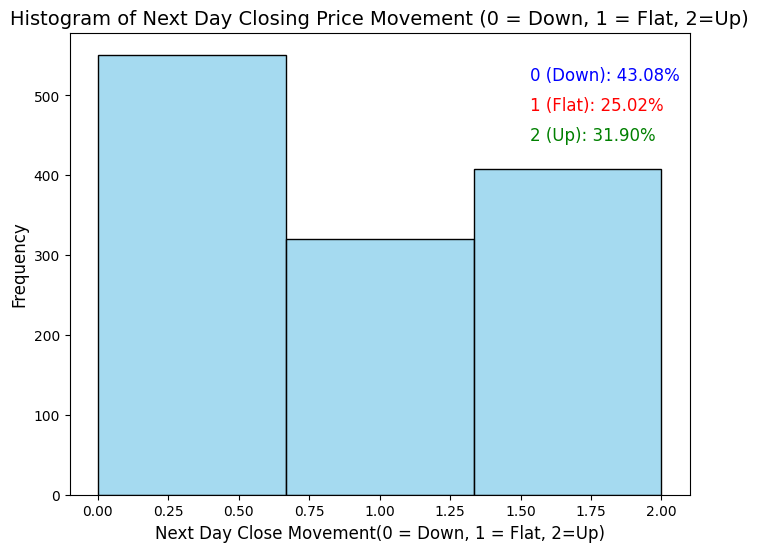

Mean: 0.89 (Proportion of 1's: 25.02%)
Standard Deviation: 0.86
Count of 0's (Down): 551
Count of 1's (Up): 320
Count of 2's (Up): 408


In [7]:
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

# Add the 'Next_Close_Higher' column (binary classification target)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df['Next_Close_temp'] = df['Close'].pct_change()
# Define the quantile thresholds
lower_bound = -0.005
upper_bound = 0.005

"""lower_bound = df['Next_Close_temp'].quantile(0.35)# 25th percentile (Q1)
upper_bound = df['Next_Close_temp'].quantile(0.65)  # 75th percentile (Q3)"""

# Classify the movements
df['Next_Close_Higher'] = 0  # Default to 0
df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2  # Upper movement
df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1  # Lower movement


# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Next_Close_Higher'], bins=3, kde=False, color='skyblue', edgecolor='black')

# Calculate the percentage of 0's and 1's
percentage_zeros = (df['Next_Close_Higher'] == 0).mean() * 100
percentage_ones = (df['Next_Close_Higher'] == 1).mean() * 100
percentage_twos = (df['Next_Close_Higher'] == 2).mean() * 100


# Add title and labels
plt.title('Histogram of Next Day Closing Price Movement (0 = Down, 1 = Flat, 2=Up)', fontsize=14)
plt.xlabel('Next Day Close Movement(0 = Down, 1 = Flat, 2=Up)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the percentages in the plot
plt.figtext(0.7, 0.8, f'0 (Down): {percentage_zeros:.2f}%', fontsize=12, color='blue')
plt.figtext(0.7, 0.75, f'1 (Flat): {percentage_ones:.2f}%', fontsize=12, color='red')
plt.figtext(0.7, 0.7, f'2 (Up): {percentage_twos:.2f}%', fontsize=12, color='green')

# Show the plot
plt.show()

# Print basic statistics
mean = df['Next_Close_Higher'].mean()
std = df['Next_Close_Higher'].std()
count_zeros = (df['Next_Close_Higher'] == 0).sum()
count_ones = (df['Next_Close_Higher'] == 1).sum()
count_two = (df['Next_Close_Higher'] == 2).sum()


print(f"Mean: {mean:.2f} (Proportion of 1's: {percentage_ones:.2f}%)")
print(f"Standard Deviation: {std:.2f}")
print(f"Count of 0's (Down): {count_zeros}")
print(f"Count of 1's (Up): {count_ones}")
print(f"Count of 2's (Up): {count_two}")

In [8]:
df.columns

MultiIndex([(            'Close', '^GSPC'),
            (             'High', '^GSPC'),
            (              'Low', '^GSPC'),
            (             'Open', '^GSPC'),
            (           'Volume', '^GSPC'),
            ('Next_Close_Higher',      ''),
            (  'Next_Close_temp',      '')],
           names=['Price', 'Ticker'])

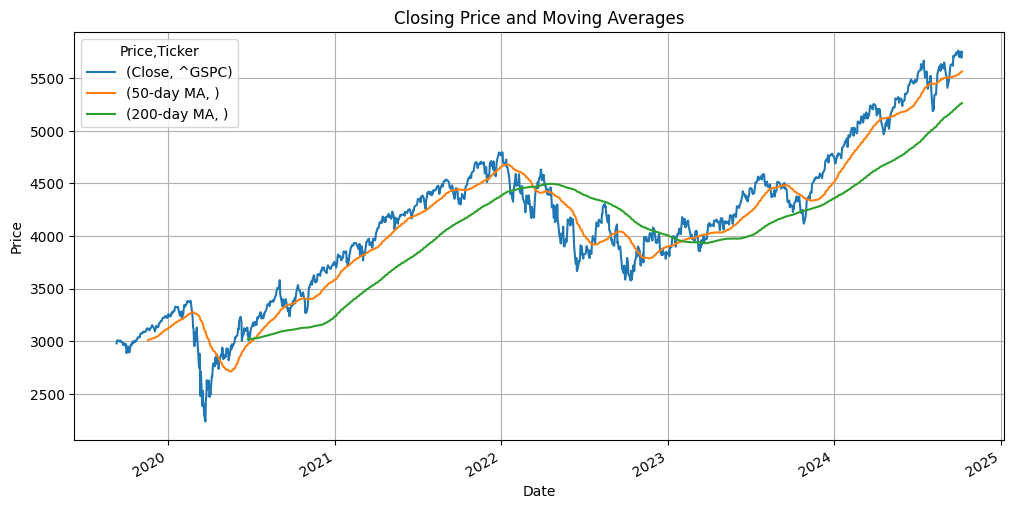

In [9]:
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

df[['Close', '50-day MA', '200-day MA']].plot(figsize=(12, 6))
plt.title('Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\834158254.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_price = float(close_prices.mean())  # Convert to float
C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\834158254.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std_price = float(close_prices.std())    # Convert to float
C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\834158254.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  skewness = float(skew(close_prices))     # Convert to float


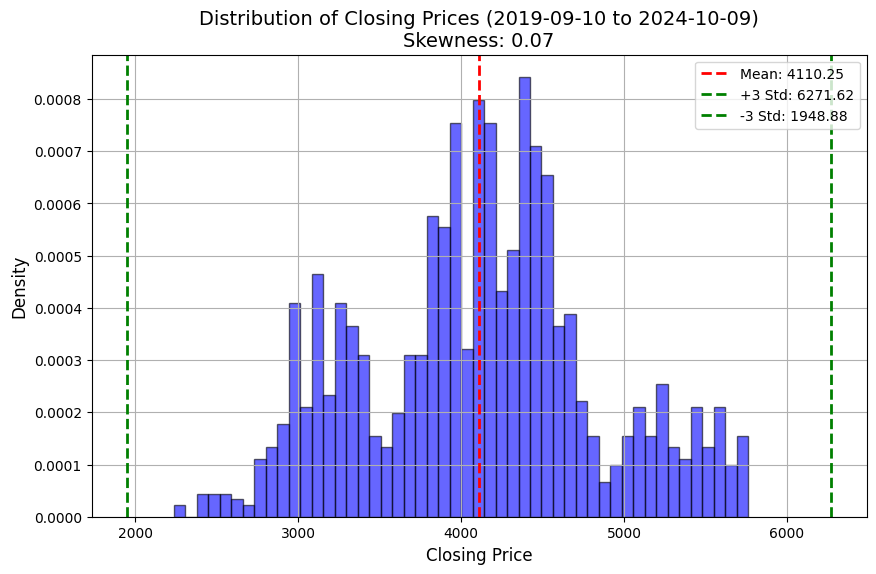

In [10]:

# Extract the 'Close' column
close_prices = df['Close'].dropna()

# Calculate statistics
mean_price = float(close_prices.mean())  # Convert to float
std_price = float(close_prices.std())    # Convert to float
skewness = float(skew(close_prices))     # Convert to float

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(close_prices, bins=50, alpha=0.6, color='b', edgecolor='black', density=True)

# Plot mean and standard deviation intervals
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(mean_price + 3*std_price, color='g', linestyle='dashed', linewidth=2, label=f'+3 Std: {(mean_price + 3*std_price):.2f}')
plt.axvline(mean_price - 3*std_price, color='g', linestyle='dashed', linewidth=2, label=f'-3 Std: {(mean_price - 3*std_price):.2f}')

# Add title and labels
plt.title(f'Distribution of Closing Prices ({start_date} to {end_date})\nSkewness: {skewness:.2f}', fontsize=14)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\3365681948.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  mean_price = float(close_prices.mean())  # Convert to float
C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\3365681948.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  std_price = float(close_prices.std())    # Convert to float
C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\3365681948.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  skewness = float(skew(close_prices))     # Convert to float


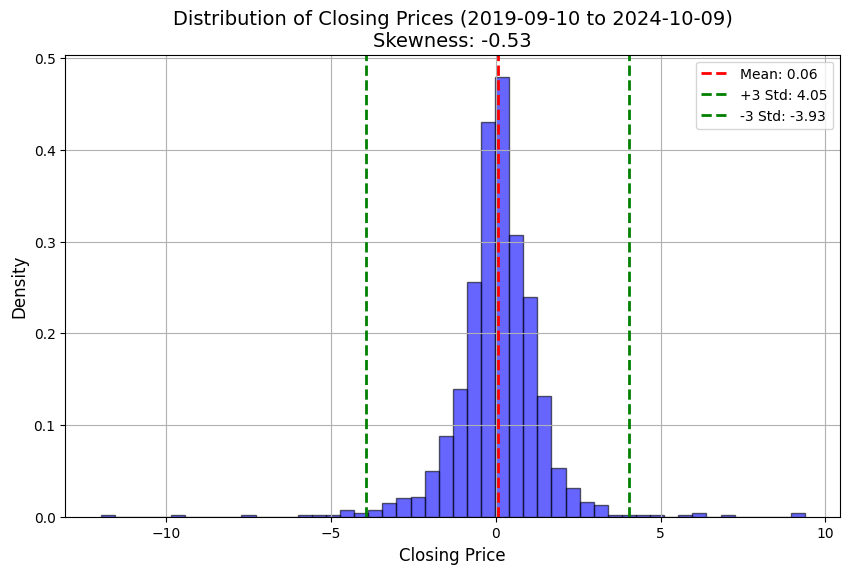

In [11]:

# Extract the 'Close' column
close_prices =100* df['Close'].pct_change().dropna()

# Calculate statistics
mean_price = float(close_prices.mean())  # Convert to float
std_price = float(close_prices.std())    # Convert to float
skewness = float(skew(close_prices))     # Convert to float

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(close_prices, bins=50, alpha=0.6, color='b', edgecolor='black', density=True)

# Plot mean and standard deviation intervals
plt.axvline(mean_price, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.axvline(mean_price + 3*std_price, color='g', linestyle='dashed', linewidth=2, label=f'+3 Std: {(mean_price + 3*std_price):.2f}')
plt.axvline(mean_price - 3*std_price, color='g', linestyle='dashed', linewidth=2, label=f'-3 Std: {(mean_price - 3*std_price):.2f}')

# Add title and labels
plt.title(f'Distribution of Closing Prices ({start_date} to {end_date})\nSkewness: {skewness:.2f}', fontsize=14)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

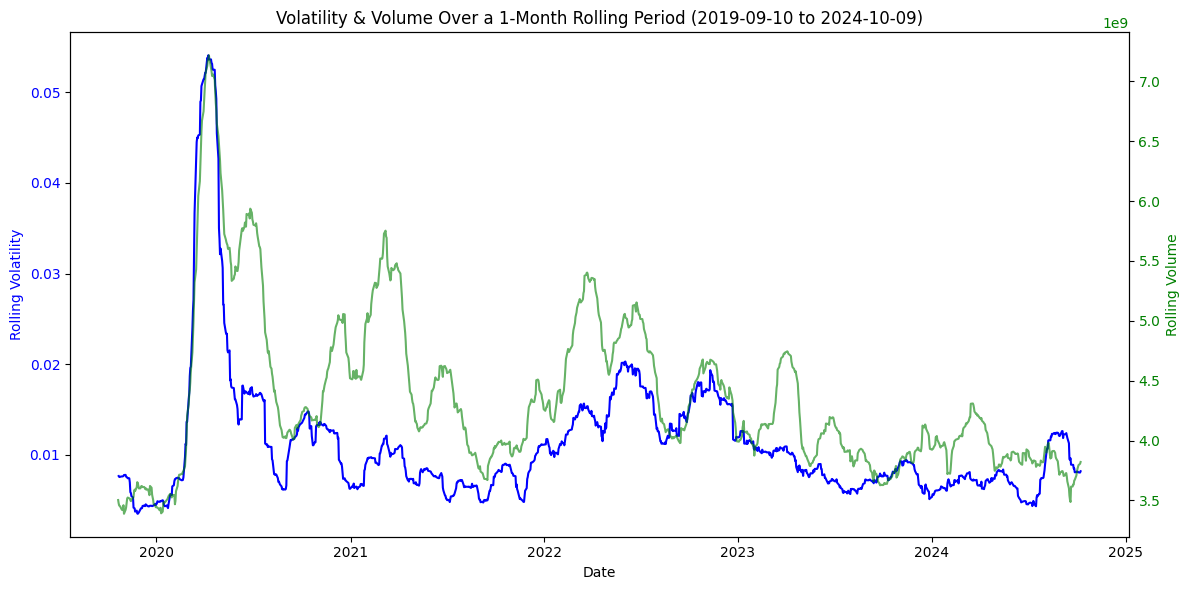

In [12]:
# Compute log returns
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Compute 30-day rolling volatility (standard deviation of log returns)
df['Rolling Volatility'] = df['Log Returns'].rolling(window=30).std()

# Compute 30-day rolling average of volume
df['Rolling Volume'] = df['Volume'].rolling(window=30).mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot rolling volatility (left y-axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Volatility', color='blue')
ax1.plot(df.index, df['Rolling Volatility'], color='blue', label='Volatility (30-day Rolling)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Volume', color='green')
ax2.plot(df.index, df['Rolling Volume'], color='green', label='Volume (30-day Rolling)', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='green')

# Titles and legend
plt.title(f'Volatility & Volume Over a 1-Month Rolling Period ({start_date} to {end_date})')
fig.tight_layout()
plt.show()

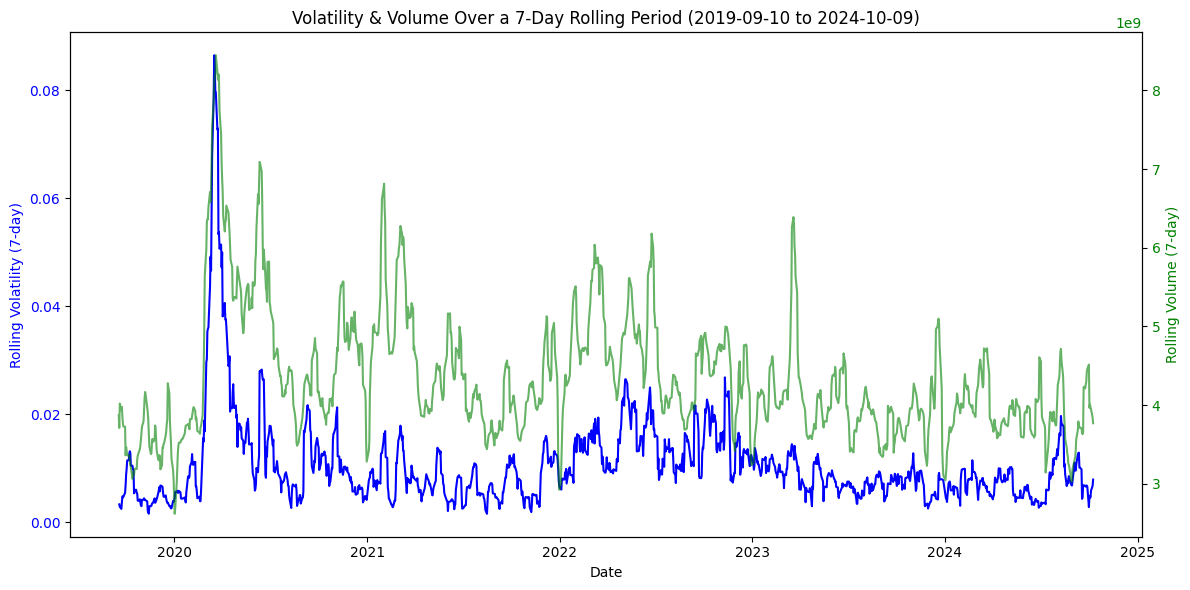

In [13]:
# Compute 7-day rolling volatility (standard deviation of log returns)
df['Rolling Volatility 7D'] = df['Log Returns'].rolling(window=7).std()

# Compute 7-day rolling average of volume
df['Rolling Volume 7D'] = df['Volume'].rolling(window=7).mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 7-day rolling volatility (left y-axis)
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Volatility (7-day)', color='blue')
ax1.plot(df.index, df['Rolling Volatility 7D'], color='blue', label='Volatility (7-day Rolling)')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for volume
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Volume (7-day)', color='green')
ax2.plot(df.index, df['Rolling Volume 7D'], color='green', label='Volume (7-day Rolling)', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='green')

# Titles and legend
plt.title(f'Volatility & Volume Over a 7-Day Rolling Period ({start_date} to {end_date})')
fig.tight_layout()
plt.show()


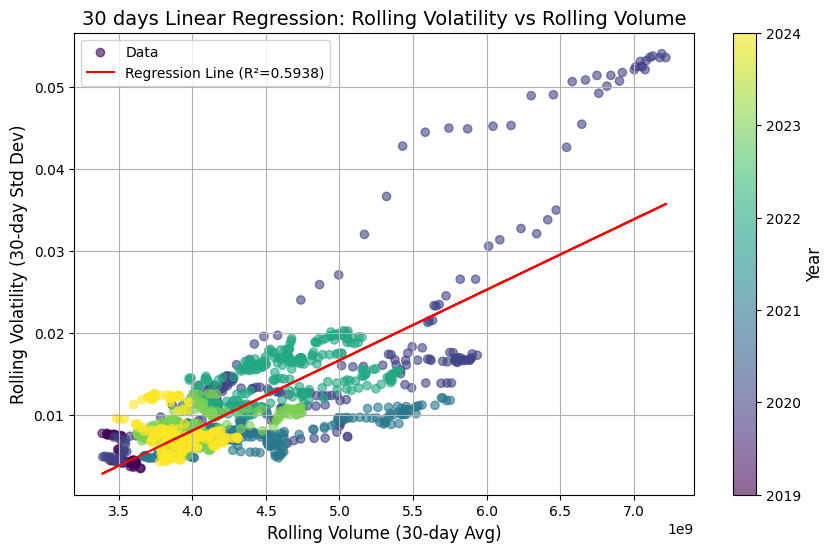

Linear Regression Results:
Slope (β1): 0.000000
Intercept (β0): -0.026256
R² (Explained Variance): 0.5938


In [14]:
# Define X (independent) and Y (dependent) variables
X = df['Rolling Volume'].dropna().values.reshape(-1, 1)  # Feature (reshaped for sklearn)
Y = df['Rolling Volatility'].dropna().values             # Target
dates=df.index[30:]
X=X[1:]
# Fit linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Get regression parameters
slope = reg.coef_[0]  # Beta coefficient
intercept = reg.intercept_  # Intercept
r_squared = reg.score(X, Y)  # R-squared

# Normalize dates to map them to a color scale
norm = mcolors.Normalize(vmin=dates.min().timestamp(), vmax=dates.max().timestamp())
cmap = cm.viridis  # Choose a colormap

# Create scatter plot with color based on date
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(X, Y, 
                c=dates.map(lambda d: d.year), cmap=cmap, alpha=0.6, label='Data')

# Plot regression line
ax.plot(X, reg.predict(X), color='red', label=f'Regression Line (R²={r_squared:.4f})')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Year', fontsize=12)

# Labels & title
plt.xlabel('Rolling Volume (30-day Avg)', fontsize=12)
plt.ylabel('Rolling Volatility (30-day Std Dev)', fontsize=12)
plt.title('30 days Linear Regression: Rolling Volatility vs Rolling Volume', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression info
print(f"Linear Regression Results:")
print(f"Slope (β1): {slope:.6f}")
print(f"Intercept (β0): {intercept:.6f}")
print(f"R² (Explained Variance): {r_squared:.4f}")

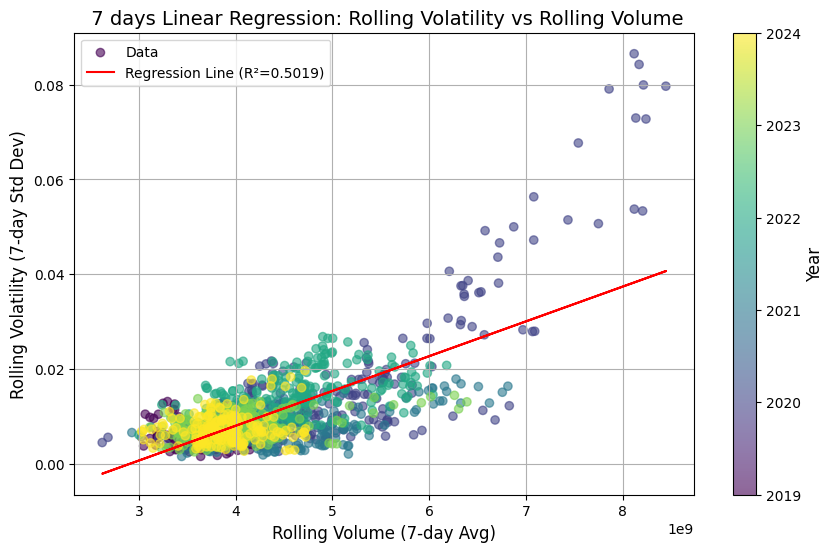

Linear Regression Results:
Slope (β1): 0.000000
Intercept (β0): -0.021305
R² (Explained Variance): 0.5019


In [15]:
# Define X (independent) and Y (dependent) variables
X = df['Rolling Volume 7D'].dropna().values.reshape(-1, 1)  # Feature (reshaped for sklearn)
Y = df['Rolling Volatility 7D'].dropna().values             # Target
dates=df.index[7:]
X=X[1:]
# Fit linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Get regression parameters
slope = reg.coef_[0]  # Beta coefficient
intercept = reg.intercept_  # Intercept
r_squared = reg.score(X, Y)  # R-squared

# Normalize dates to map them to a color scale
norm = mcolors.Normalize(vmin=dates.min().timestamp(), vmax=dates.max().timestamp())
cmap = cm.viridis  # Choose a colormap

# Create scatter plot with color based on date
fig, ax = plt.subplots(figsize=(10, 6))
sc = ax.scatter(X, Y, 
                c=dates.map(lambda d: d.year), cmap=cmap, alpha=0.6, label='Data')

# Plot regression line
ax.plot(X, reg.predict(X), color='red', label=f'Regression Line (R²={r_squared:.4f})')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Year', fontsize=12)

# Labels & title
plt.xlabel('Rolling Volume (7-day Avg)', fontsize=12)
plt.ylabel('Rolling Volatility (7-day Std Dev)', fontsize=12)
plt.title(' 7 days Linear Regression: Rolling Volatility vs Rolling Volume', fontsize=14)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression info
print(f"Linear Regression Results:")
print(f"Slope (β1): {slope:.6f}")
print(f"Intercept (β0): {intercept:.6f}")
print(f"R² (Explained Variance): {r_squared:.4f}")

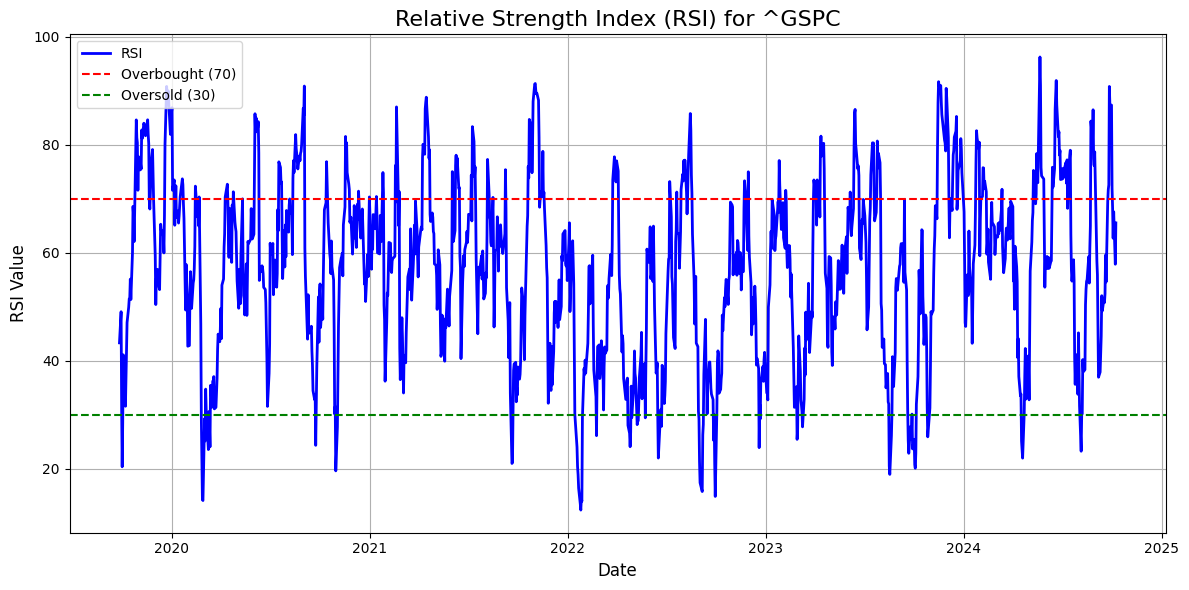

In [16]:
# Calculate daily price changes
df['Price Change'] = df['Close'].diff()

# Separate the price changes into gains (positive changes) and losses (negative changes)
df['Gain'] = np.where(df['Price Change'] > 0, df['Price Change'], 0)
df['Loss'] = np.where(df['Price Change'] < 0, -df['Price Change'], 0)

# Calculate rolling averages of gains and losses (14-day period)
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# Calculate the Relative Strength (RS)
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Plot the RSI
plt.figure(figsize=(12, 6))

# RSI plot
plt.plot(df.index, df['RSI'], label='RSI', color='blue', linewidth=2)

# Add horizontal lines for overbought (70) and oversold (30) levels
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Add title and labels
plt.title(f'Relative Strength Index (RSI) for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('RSI Value', fontsize=12)
plt.legend(loc='upper left')

# Enhance the plot with grid and tight layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

# Add the 'Next_Close_Higher' column (binary classification target)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)


# For a logistic approach with lag_1, lag_2, etc.
data = pd.DataFrame()
max_lag = 5
for lag in range(1, max_lag + 1):
    data[f'lag_{lag}'] = df['Next_Close_Higher'].shift(lag)

data['target'] = df['Next_Close_Higher']
data.dropna(inplace=True)

X = data[[f'lag_{i}' for i in range(1, max_lag+1)]]
y = data['target']

# Add intercept
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())


[*********************100%***********************]  1 of 1 completed

Optimization terminated successfully.
         Current function value: 0.687613
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1274
Model:                          Logit   Df Residuals:                     1268
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                0.003187
Time:                        14:57:06   Log-Likelihood:                -876.02
converged:                       True   LL-Null:                       -878.82
Covariance Type:            nonrobust   LLR p-value:                    0.3470
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2493      0.154      1.616      0.106      -0.053       0.552
lag_1         -0.2038      0.

In [18]:
# 1) Download data (same as your code)
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# 2) Calculate daily percentage change
df['Next_Close_temp'] = df['Close'].pct_change()

# 3) Define the quantile thresholds (or fixed thresholds, as you do)
lower_bound = -0.005
upper_bound = 0.005

# 4) Classify the movements into 3 classes:
#    0 = "no big movement," 1 = "down," 2 = "up."
df['Next_Close_Higher'] = 0
df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2
df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1

# 5) Build lag features. Let's do 5 lags of the same tri-class variable.
max_lag = 5
data = pd.DataFrame()
for lag in range(1, max_lag + 1):
    data[f'lag_{lag}'] = df['Next_Close_Higher'].shift(lag)

data['target'] = df['Next_Close_Higher']
data.dropna(inplace=True)

X = data[[f'lag_{i}' for i in range(1, max_lag + 1)]]
y = data['target']  # values in {0,1,2}

# 6) Multinomial logistic regression in statsmodels
#    - Add an intercept column
X = sm.add_constant(X)

# MNLogit expects y to be numeric discrete in {0, 1, 2, ...}
model = sm.MNLogit(y, X)
results = model.fit()
print(results.summary())


[*********************100%***********************]  1 of 1 completed

Optimization terminated successfully.
         Current function value: 1.058409
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                 target   No. Observations:                 1274
Model:                        MNLogit   Df Residuals:                     1262
Method:                           MLE   Df Model:                           10
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                 0.01505
Time:                        14:57:07   Log-Likelihood:                -1348.4
converged:                       True   LL-Null:                       -1369.0
Covariance Type:            nonrobust   LLR p-value:                 1.042e-05
  target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3458      0.172     -7.833      0.000      -1.683      -1.009
lag_1          0.0957      0.

In [19]:
print(y)

Date
2019-09-17    0
2019-09-18    0
2019-09-19    0
2019-09-20    0
2019-09-23    0
             ..
2024-10-02    0
2024-10-03    0
2024-10-04    2
2024-10-07    1
2024-10-08    2
Name: target, Length: 1274, dtype: int64


# **MODEL**

## **TRINARY**

[*********************100%***********************]  1 of 1 completed


accuracy is for 0 0.43080531665363564
Permutation test p-value: 1.0
accuracy is for 1 0.45305164319248825
Permutation test p-value: 0.0
accuracy is for 2 0.4659357870007831
Permutation test p-value: 0.0
accuracy is for 3 0.4663009404388715
Permutation test p-value: 0.0
accuracy is for 4 0.4611764705882353
Permutation test p-value: 0.0
accuracy is for 5 0.45368916797488223
Permutation test p-value: 0.0
accuracy is for 6 0.4579732914375491
Permutation test p-value: 0.0
accuracy is for 7 0.45990566037735847
Permutation test p-value: 0.0
accuracy is for 8 0.45948072383949645
Permutation test p-value: 0.0
accuracy is for 9 0.4582677165354331
Permutation test p-value: 0.0
accuracy is for 10 0.45468873128447596
Permutation test p-value: 0.0
accuracy is for 11 0.45425867507886436
Permutation test p-value: 0.0
accuracy is for 12 0.4538279400157853
Permutation test p-value: 0.0


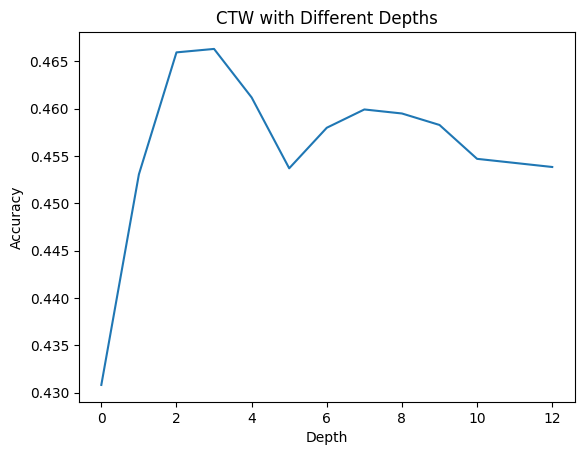

In [49]:
# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

binary=False
if binary:
    df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    max_depth=5
    nb_symbols=2

else:
    max_depth=5
    nb_symbols=3
    # Calculate daily percentage change
    df['Next_Close_temp'] = df['Close'].pct_change()


    # Define the quantile thresholds
    lower_bound = -0.005
    upper_bound = 0.005

    """lower_bound = df['Next_Close_temp'].quantile(0.35)# 25th percentile (Q1)
    upper_bound = df['Next_Close_temp'].quantile(0.65)  # 75th percentile (Q3)"""

    # Classify the movements
    df['Next_Close_Higher'] = 0  # Default to 0
    df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2  # Upper movement
    df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1  # Lower movement


    # Prepare sequence for CTW model
sequence = df['Next_Close_Higher'].values.tolist()

L_trinary=[]
depths=[i for i in range(0,max_depth)]
for depth in depths:
    # Initialize CTW model
    ctw_model = CTW(depth=depth, symbols=nb_symbols)  # Binary symbols (0 and 1)

    # Train the CTW model (this is done in the predict_sequence method)
    # We use the first part of the sequence to build the tree and predict
    distributions = ctw_model.predict_sequence(sequence, sideseq=None)
    # The distributions give the probability of the next symbol (higher or not)
    # Convert the distributions into binary predictions (0 or 1)
    predictions = np.argmax(distributions, axis=0)  # Taking the most probable symbol

    # Create a dataframe to compare actual and predicted values
    df_predictions = pd.DataFrame({
        'Actual': df['Next_Close_Higher'][depth:],  # Skip the first few rows due to context length
        'Predicted': predictions
    })



    # Assuming df_predictions is already correctly defined in your previous steps
    accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    L_trinary.append(accuracy)
    
    print(f'accuracy is for {depth}',accuracy)

    # Let's say 'df_predictions' contains the actual and predicted values:
    observed_accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    num_permutations = 1000
    permuted_accuracies = []
    
    for _ in range(num_permutations):
        # Shuffle the actual labels while keeping predictions fixed
        shuffled_labels = np.random.permutation(df_predictions['Actual'])
        permuted_accuracy = accuracy_score(shuffled_labels, df_predictions['Predicted'])
        permuted_accuracies.append(permuted_accuracy)
    
    # Compute the p-value: fraction of permutations where the permuted accuracy 
    # is greater than or equal to the observed accuracy.
    p_value = np.mean([acc >= observed_accuracy for acc in permuted_accuracies])
    print("Permutation test p-value:", round(p_value,2))


plt.plot(L_trinary)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("CTW with Different Depths")
plt.show(block=True)


[*********************100%***********************]  1 of 1 completed


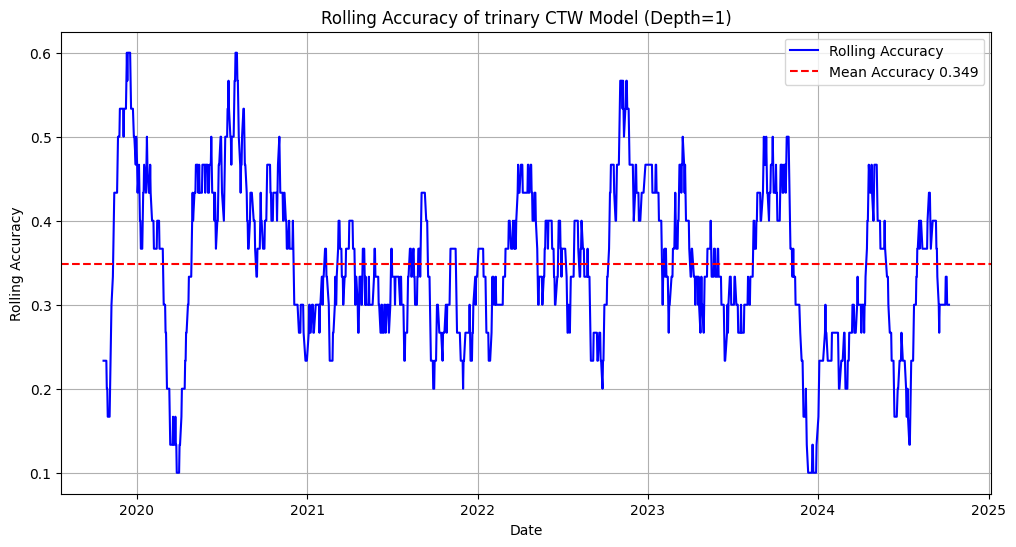

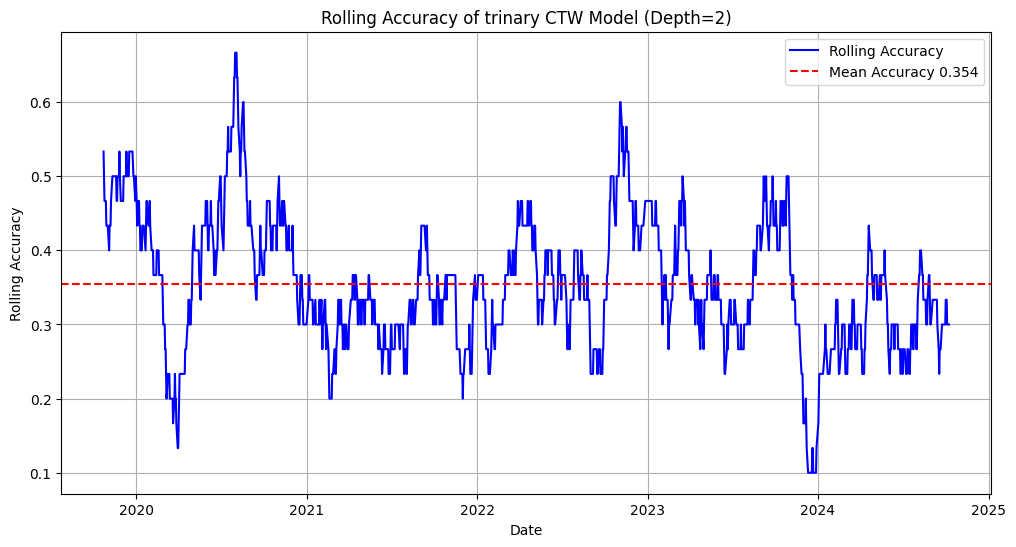

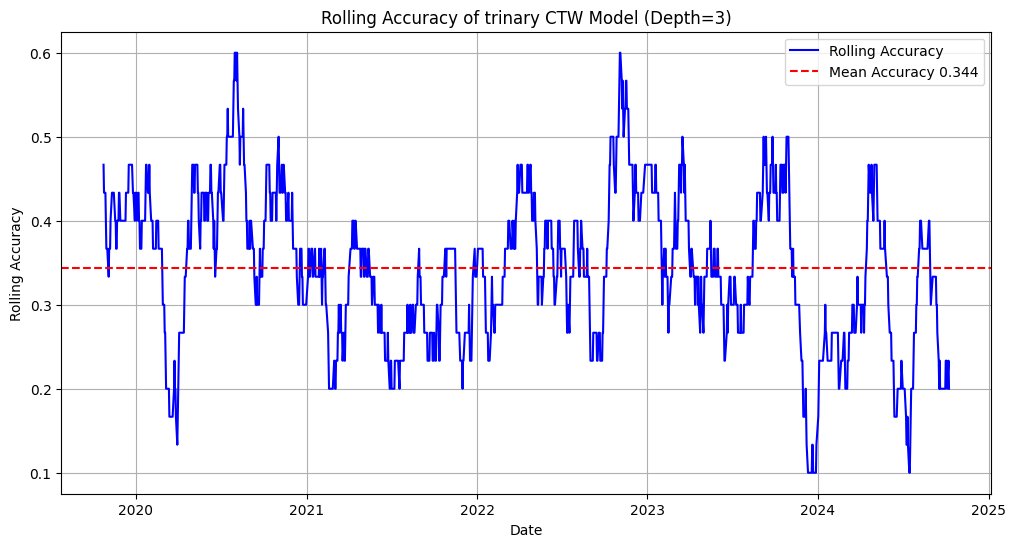

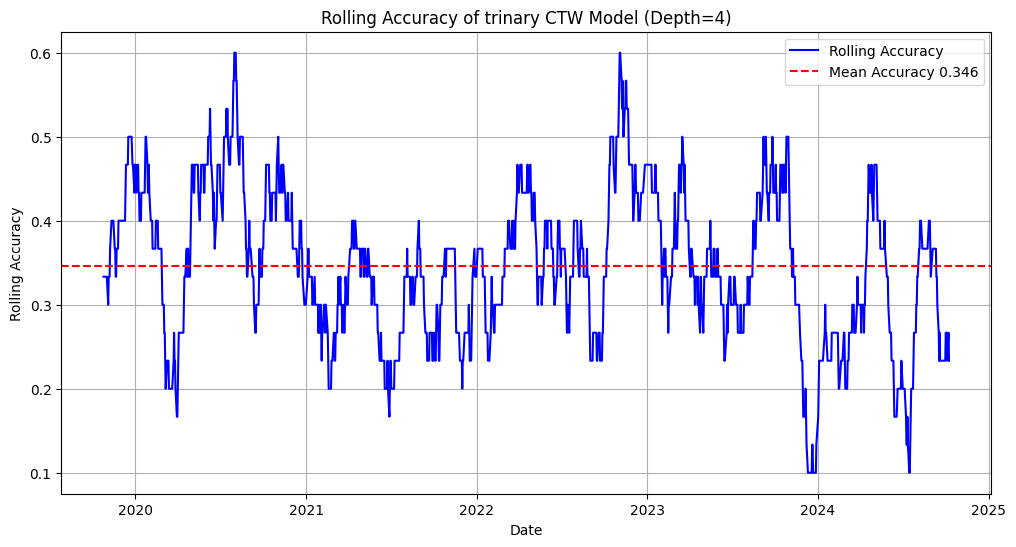

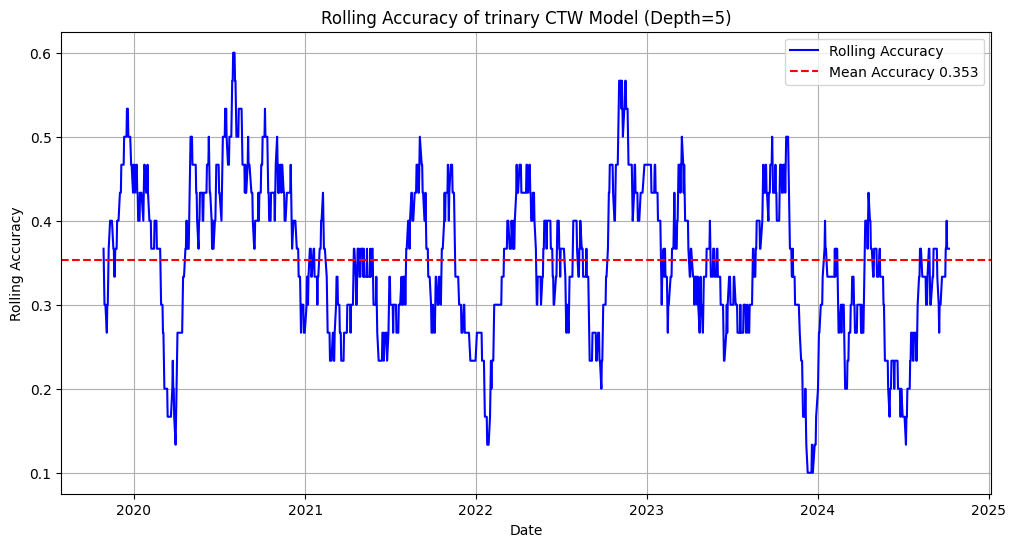

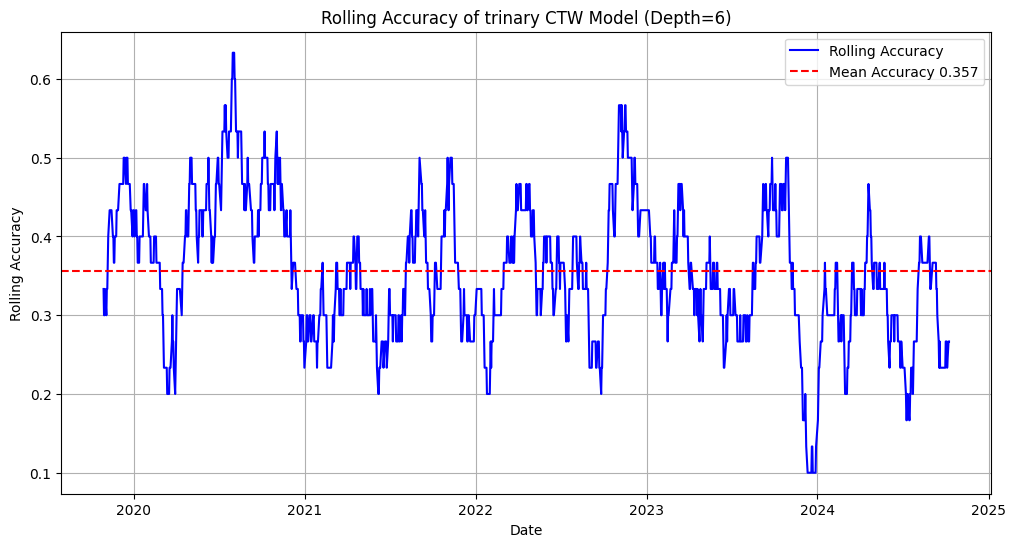

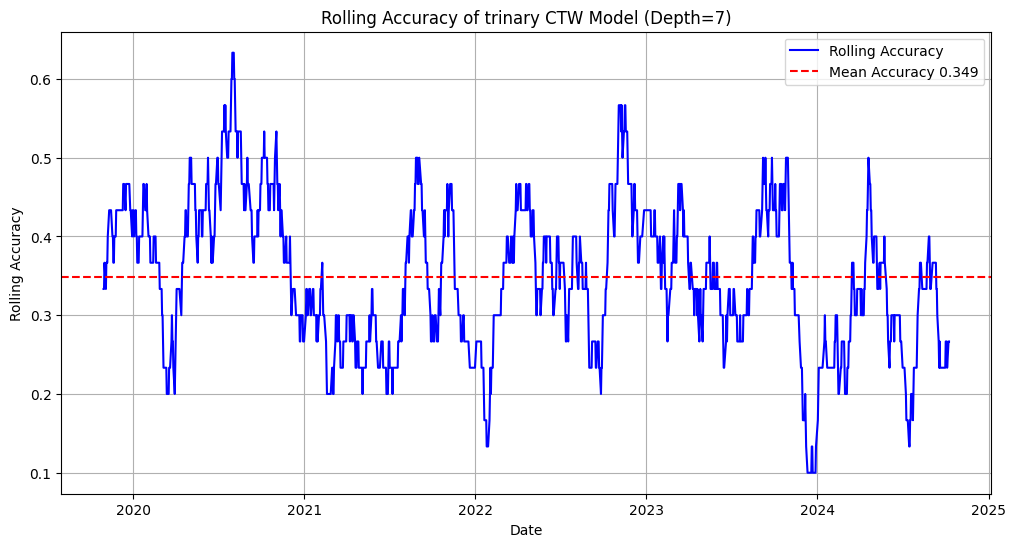

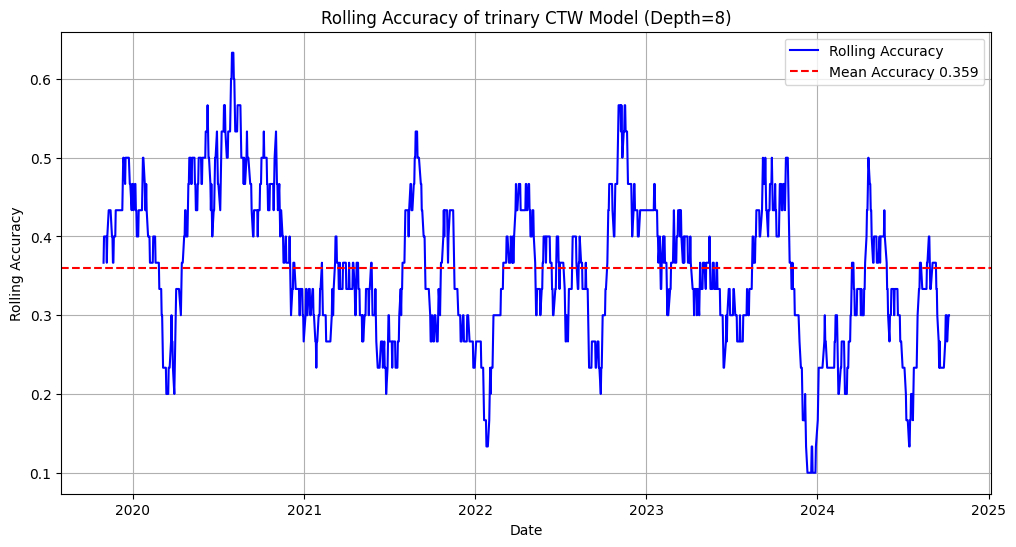

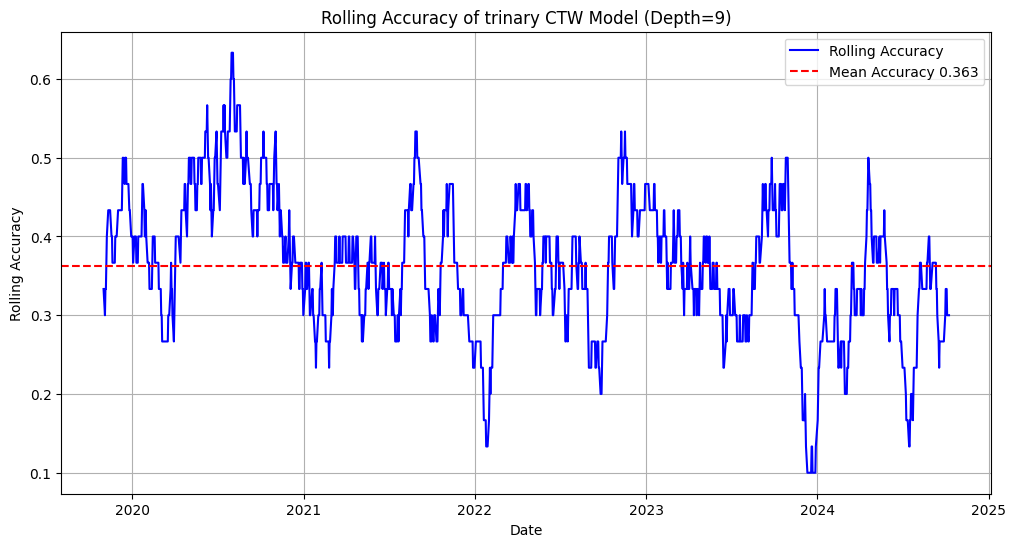

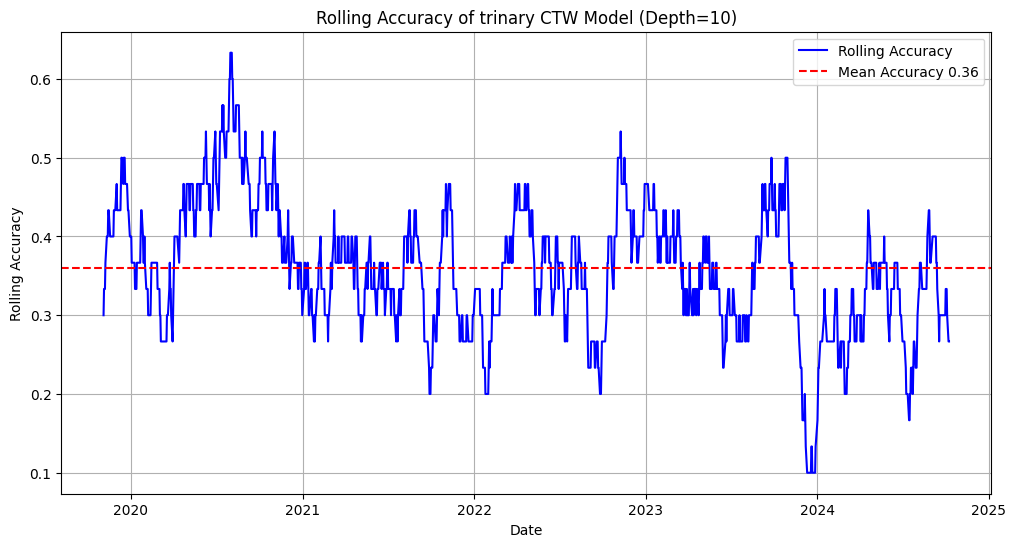

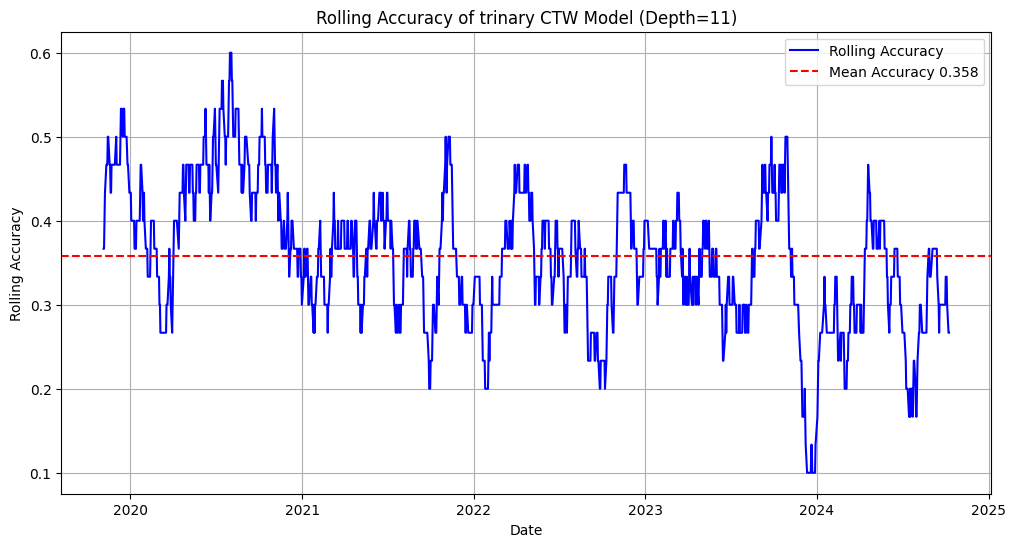

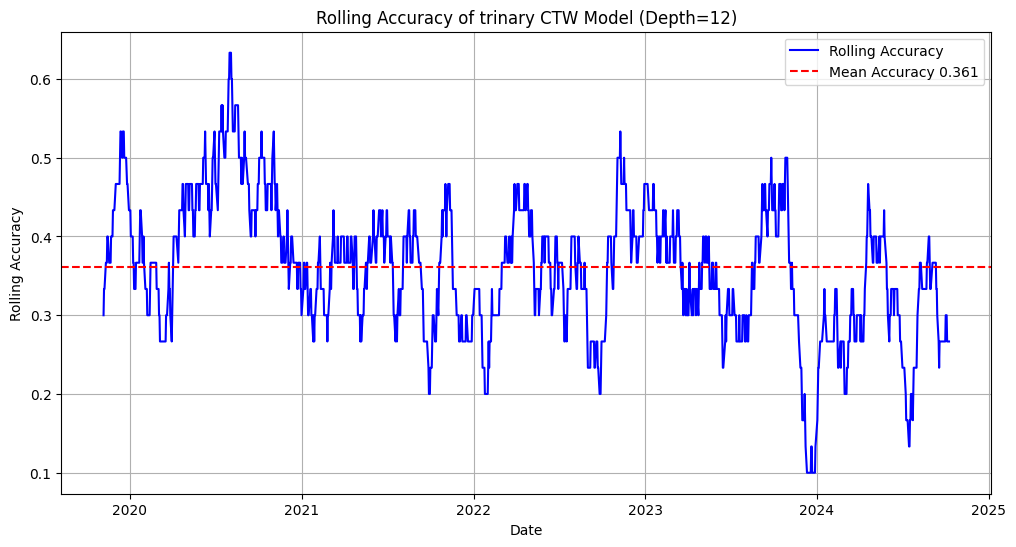

In [21]:
# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

binary=False
if binary:
    df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    max_depth=20
    nb_symbols=2

else:
    max_depth=13
    nb_symbols=3
    # Calculate daily percentage change
    df['Next_Close_temp'] = df['Close'].pct_change()


    # Define the quantile thresholds
    lower_bound = -0.005
    upper_bound = 0.005

    lower_bound = df['Next_Close_temp'].quantile(0.35)# 25th percentile (Q1)
    upper_bound = df['Next_Close_temp'].quantile(0.65)  # 75th percentile (Q3)

    # Classify the movements
    df['Next_Close_Higher'] = 0  # Default to 0
    df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2  # Upper movement
    df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1  # Lower movement


    # Prepare sequence for CTW model
sequence = df['Next_Close_Higher'].values.tolist()

depths=[i for i in range(1,max_depth)]
for depth in depths:
    ctw_model = CTW(depth=depth, symbols=nb_symbols)

    # Predict sequence
    distributions = ctw_model.predict_sequence(sequence, sideseq=None)
    predictions = np.argmax(distributions, axis=0)
    
    # Store predictions
    df_predictions = pd.DataFrame({
        'Date': df.index[depth:],  # Align dates
        'Actual': df['Next_Close_Higher'][depth:],  
        'Predicted': predictions
    })
    
    # Rolling window size
    rolling_window = 30  # Adjust as needed
    
    # Compute rolling accuracy
    df_predictions['Rolling_Accuracy'] = df_predictions['Actual'].eq(df_predictions['Predicted']).rolling(rolling_window).mean()
    
    # Plot rolling accuracy over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df_predictions['Date'], y=df_predictions['Rolling_Accuracy'], color='blue', label='Rolling Accuracy')
    plt.axhline(y=df_predictions['Rolling_Accuracy'].mean(), color='red', linestyle='--', label=f'Mean Accuracy {round(df_predictions['Rolling_Accuracy'].mean(),3)}')
    plt.xlabel('Date')
    plt.ylabel('Rolling Accuracy')
    plt.title(f'Rolling Accuracy of trinary CTW Model (Depth={depth})')
    plt.legend()
    plt.grid(True)
    plt.show()


## **BINARY**

[*********************100%***********************]  1 of 1 completed


accuracy is for 1 0.5367762128325508
Binomial test p-value: 0.0
Permutation test p-value: 0.79
accuracy is for 2 0.5371965544244323
Binomial test p-value: 0.0
Permutation test p-value: 0.72
accuracy is for 3 0.5376175548589341
Binomial test p-value: 0.0
Permutation test p-value: 0.75
accuracy is for 4 0.5372549019607843
Binomial test p-value: 0.0
Permutation test p-value: 0.85
accuracy is for 5 0.5361067503924647
Binomial test p-value: 0.01
Permutation test p-value: 0.86
accuracy is for 6 0.5380989787902593
Binomial test p-value: 0.0
Permutation test p-value: 0.61
accuracy is for 7 0.5400943396226415
Binomial test p-value: 0.0
Permutation test p-value: 0.38
accuracy is for 8 0.5389457120377655
Binomial test p-value: 0.0
Permutation test p-value: 0.55
accuracy is for 9 0.5393700787401575
Binomial test p-value: 0.0
Permutation test p-value: 0.58


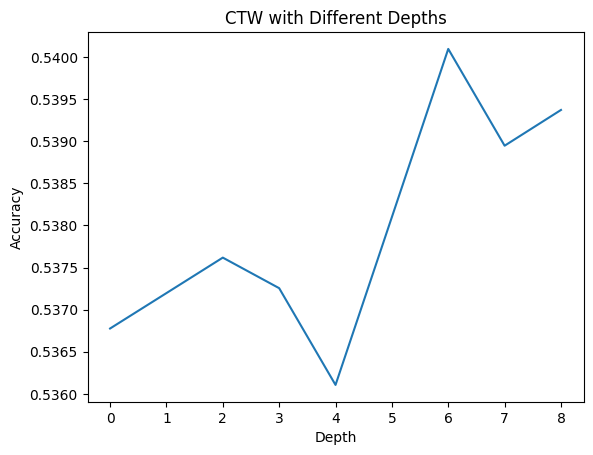

'trinary and binary'

In [22]:
# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

binary=True
if binary:
    df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    max_depth=10
    nb_symbols=2

else:
    max_depth=10
    nb_symbols=3
    # Calculate daily percentage change
    df['Next_Close_temp'] = df['Close'].pct_change()


    # Define the quantile thresholds
    lower_bound = -0.005
    upper_bound = 0.005

    lower_bound = df['Next_Close_temp'].quantile(0.35)# 25th percentile (Q1)
    upper_bound = df['Next_Close_temp'].quantile(0.65)  # 75th percentile (Q3)

    # Classify the movements
    df['Next_Close_Higher'] = 0  # Default to 0
    df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2  # Upper movement
    df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1  # Lower movement


    # Display the first few rows
    print(df.head())

    # Prepare sequence for CTW model
sequence = df['Next_Close_Higher'].values.tolist()

L_binary=[]
depths=[i for i in range(1,max_depth)]
for depth in depths:
    # Initialize CTW model
    ctw_model = CTW(depth=depth, symbols=nb_symbols)  # Binary symbols (0 and 1)

    # Train the CTW model (this is done in the predict_sequence method)
    # We use the first part of the sequence to build the tree and predict
    distributions = ctw_model.predict_sequence(sequence, sideseq=None)
    # The distributions give the probability of the next symbol (higher or not)
    # Convert the distributions into binary predictions (0 or 1)
    predictions = np.argmax(distributions, axis=0)  # Taking the most probable symbol

    # Create a dataframe to compare actual and predicted values
    df_predictions = pd.DataFrame({
        'Actual': df['Next_Close_Higher'][depth:],  # Skip the first few rows due to context length
        'Predicted': predictions
    })



    # Assuming df_predictions is already correctly defined in your previous steps
    accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    L_binary.append(accuracy)
    print(f'accuracy is for {depth}',accuracy)
    
    n = len(df_predictions)
    k = (df_predictions['Actual'] == df_predictions['Predicted']).sum()
    baseline_accuracy = 0.5
    test_result = binomtest(k, n, p=baseline_accuracy, alternative='greater')
    print("Binomial test p-value:", round(test_result.pvalue,2))
    # Let's say 'df_predictions' contains the actual and predicted values:
    observed_accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    num_permutations = 1000
    permuted_accuracies = []
    
    for _ in range(num_permutations):
        # Shuffle the actual labels while keeping predictions fixed
        shuffled_labels = np.random.permutation(df_predictions['Actual'])
        permuted_accuracy = accuracy_score(shuffled_labels, df_predictions['Predicted'])
        permuted_accuracies.append(permuted_accuracy)
    
    # Compute the p-value: fraction of permutations where the permuted accuracy 
    # is greater than or equal to the observed accuracy.
    p_value = np.mean([acc >= observed_accuracy for acc in permuted_accuracies])
    print("Permutation test p-value:", round(p_value,2))


plt.plot(L_binary)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("CTW with Different Depths")
plt.show(block=True)

"statistical signfiicance"
"trinary and binary"

[*********************100%***********************]  1 of 1 completed


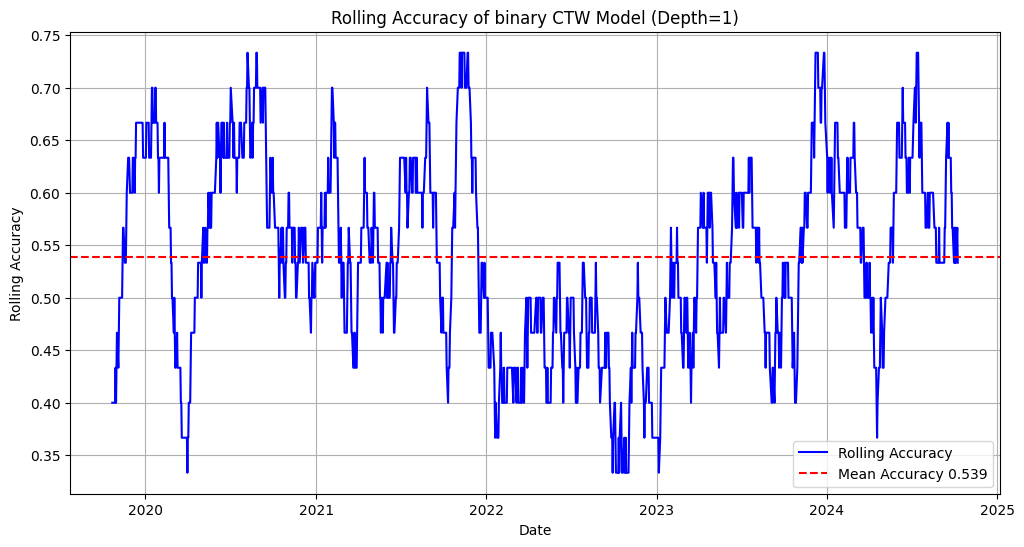

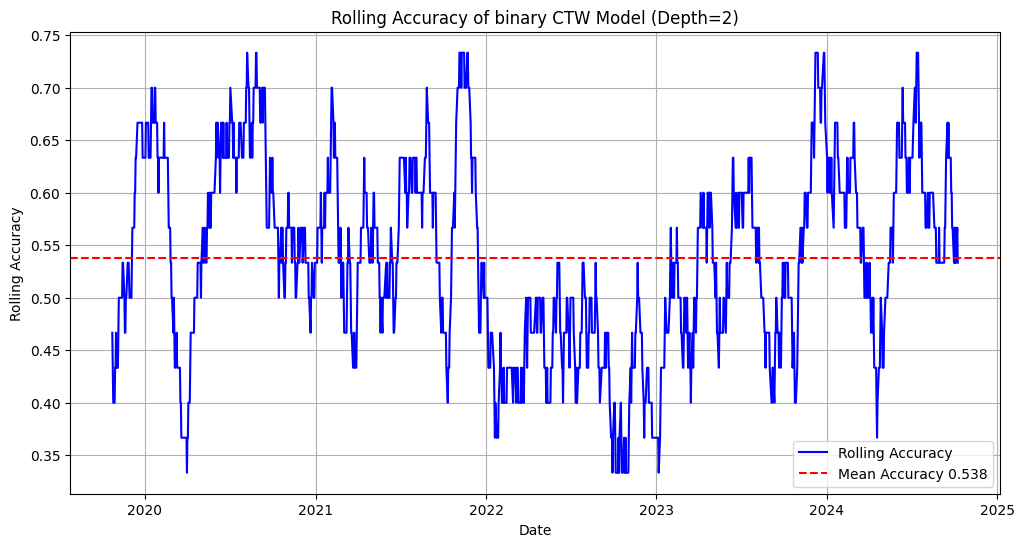

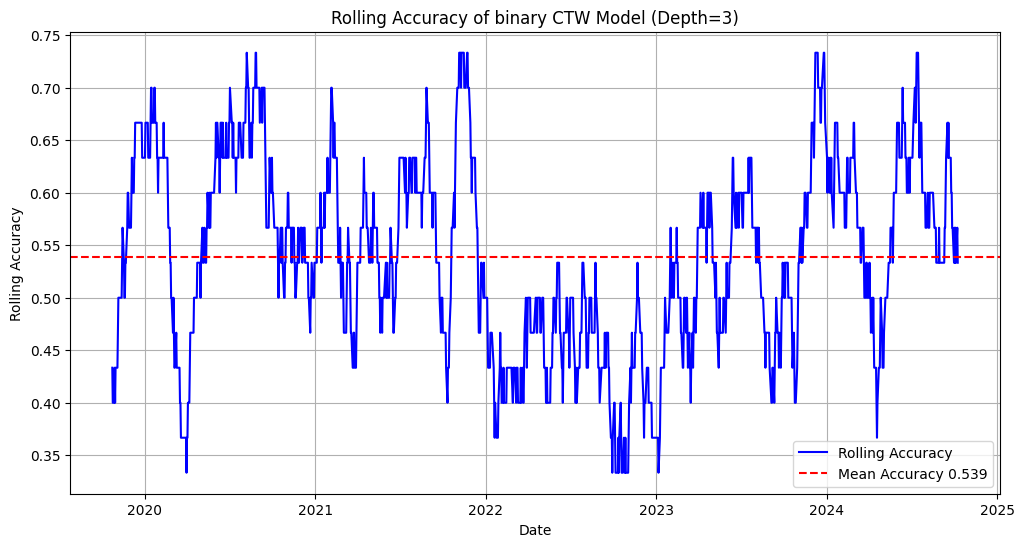

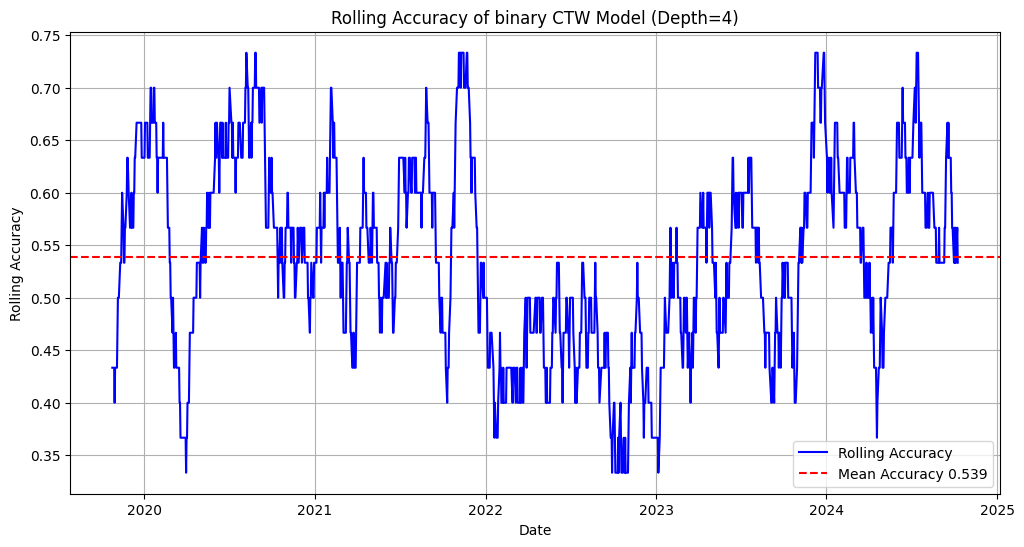

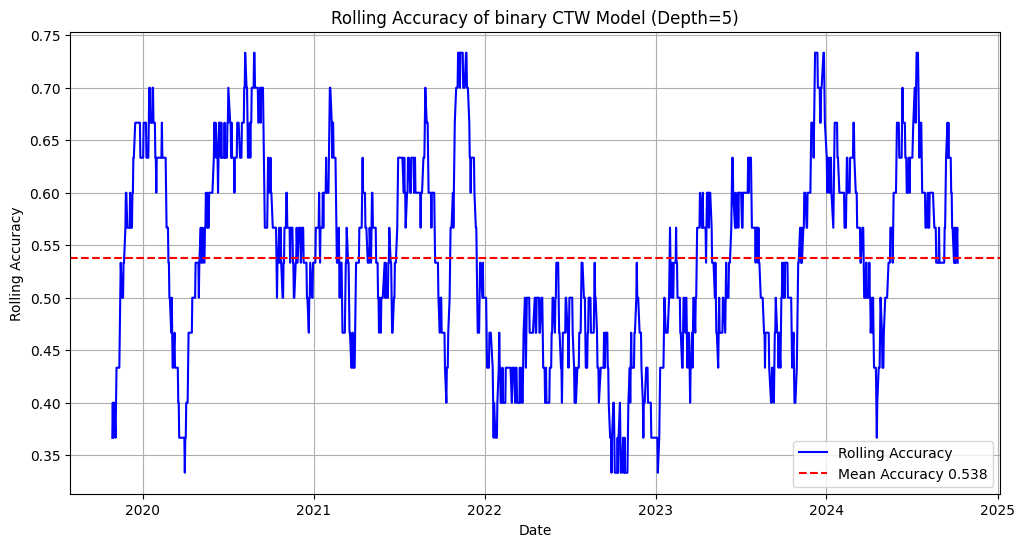

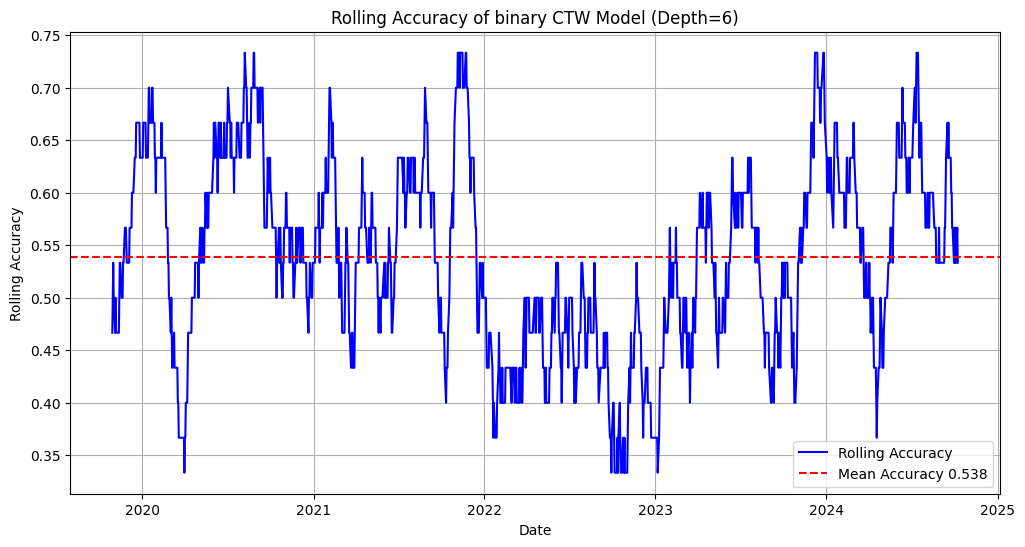

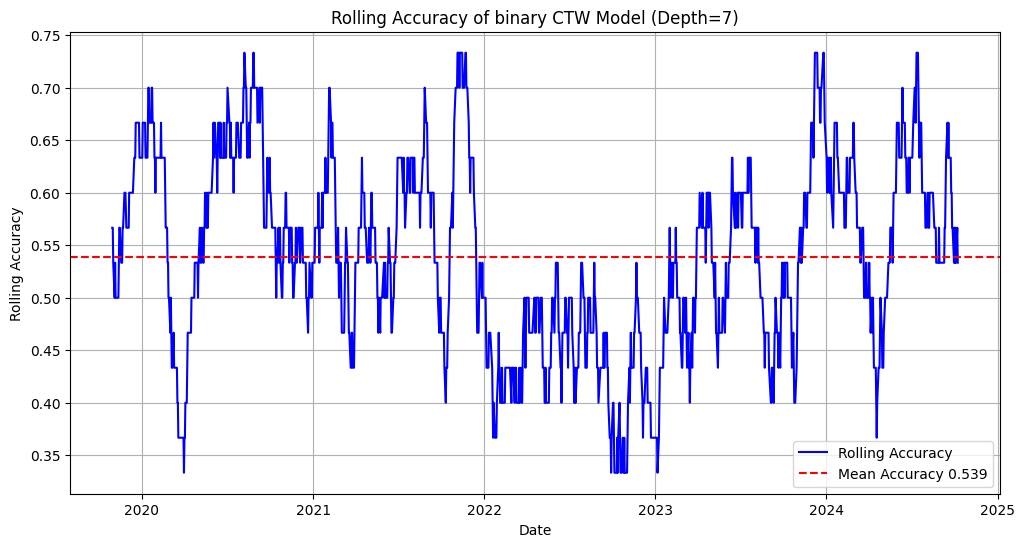

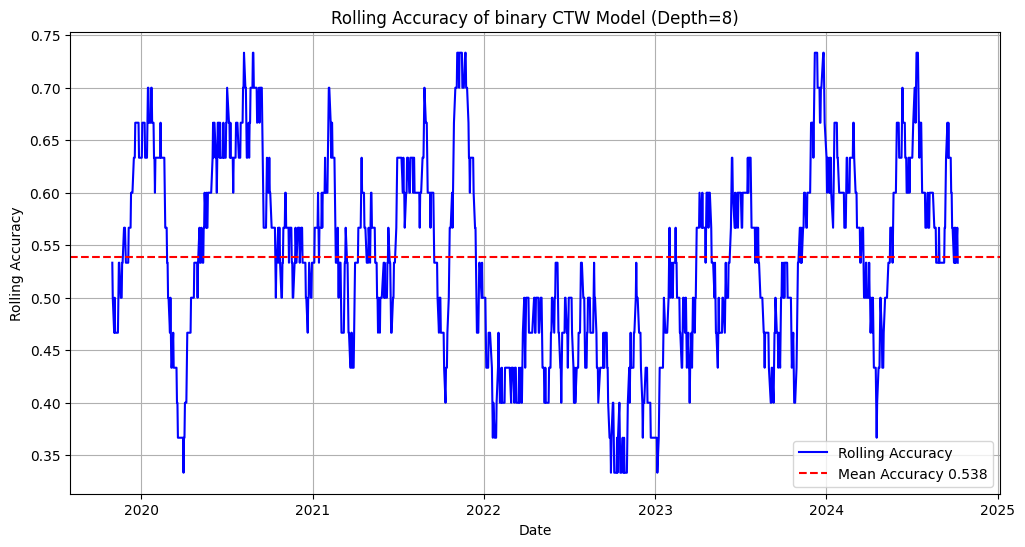

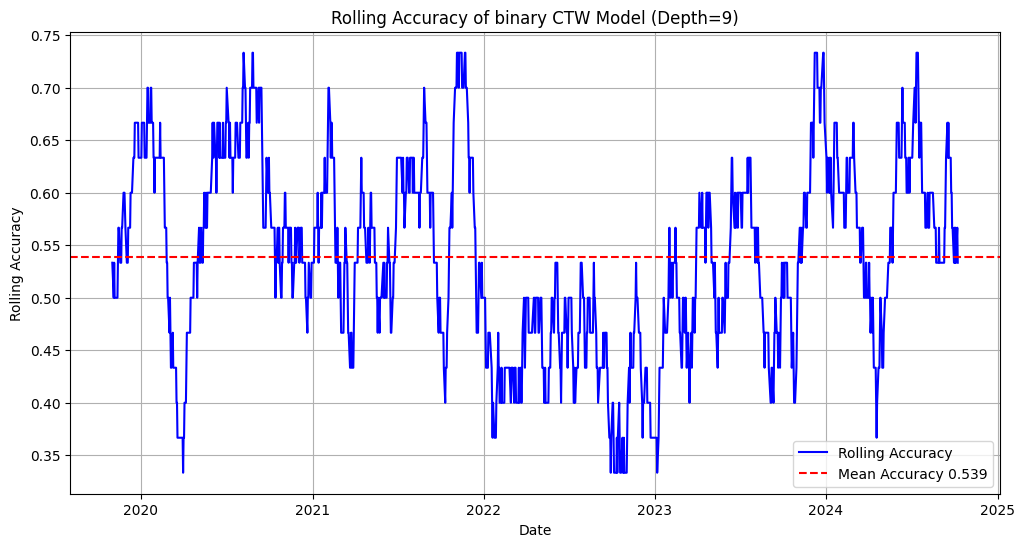

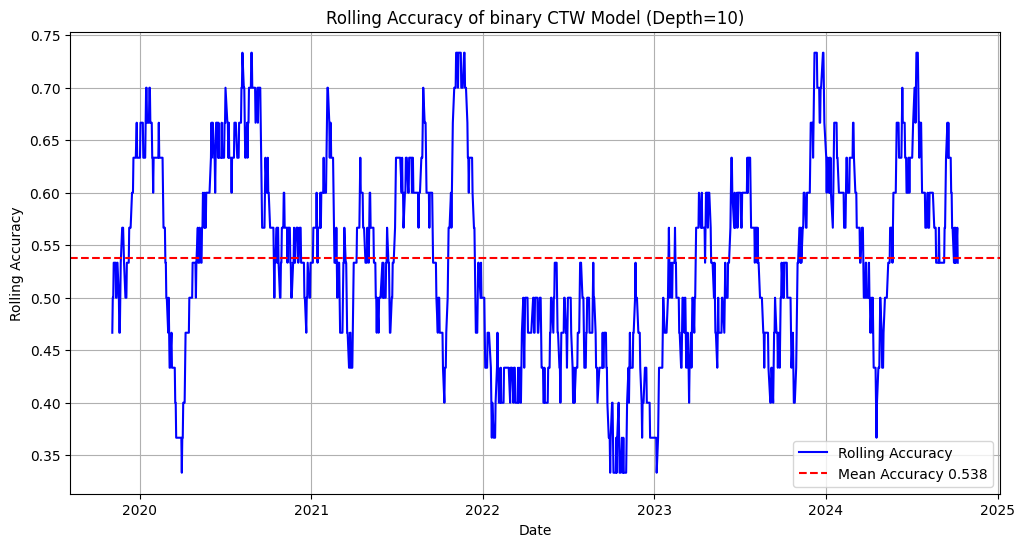

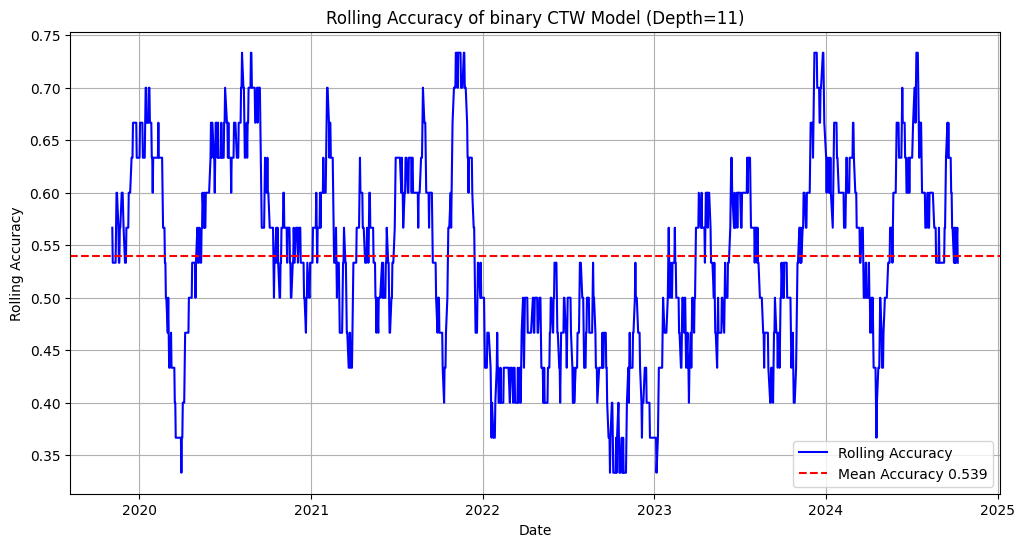

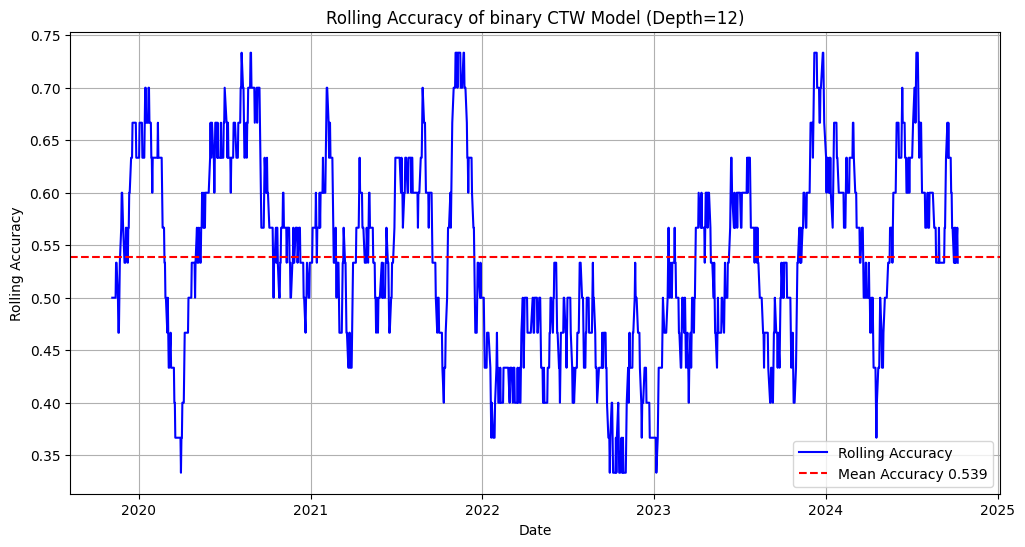

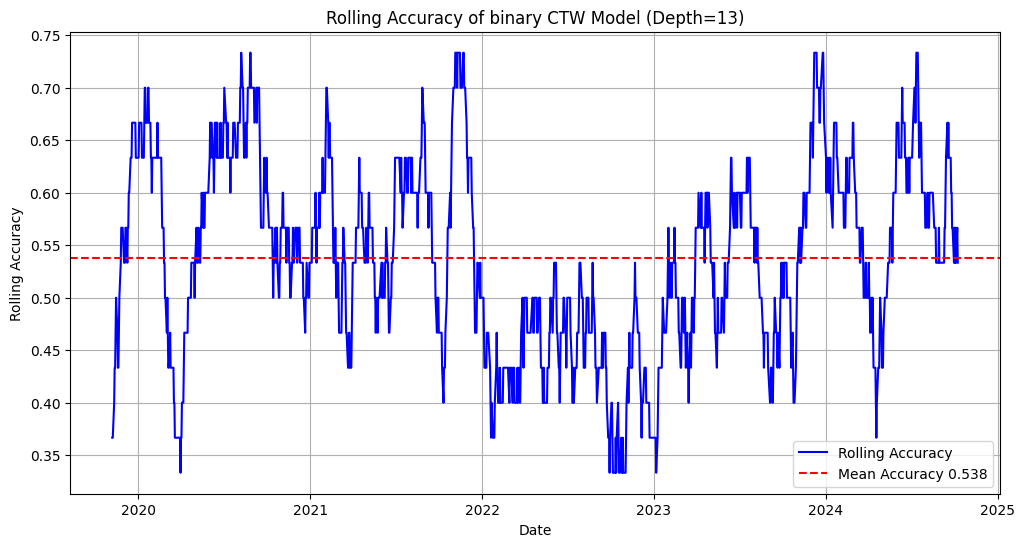

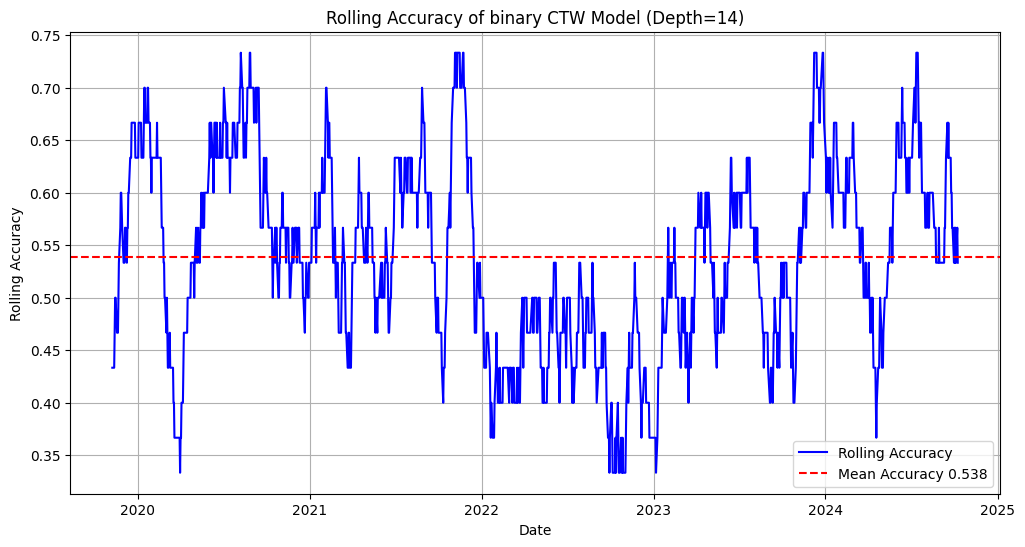

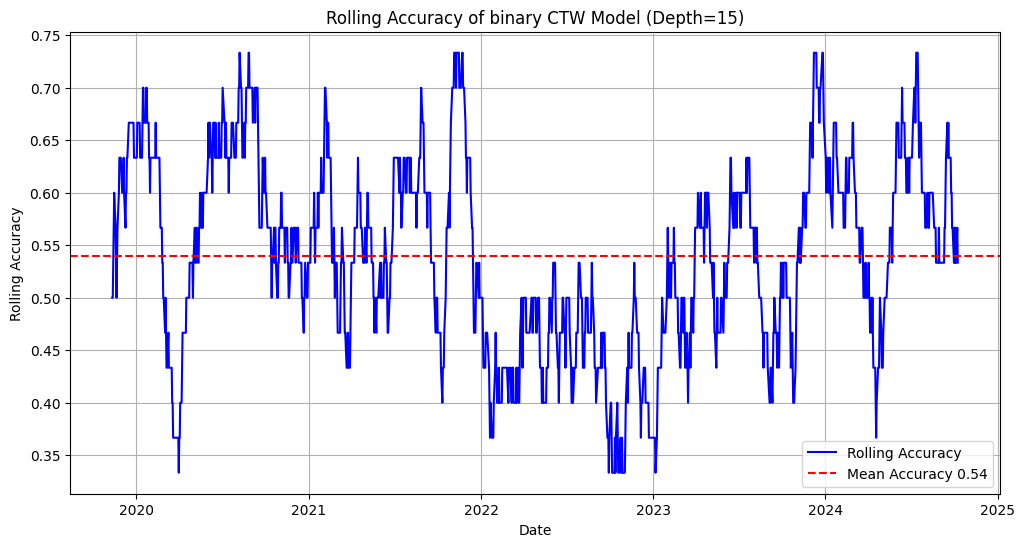

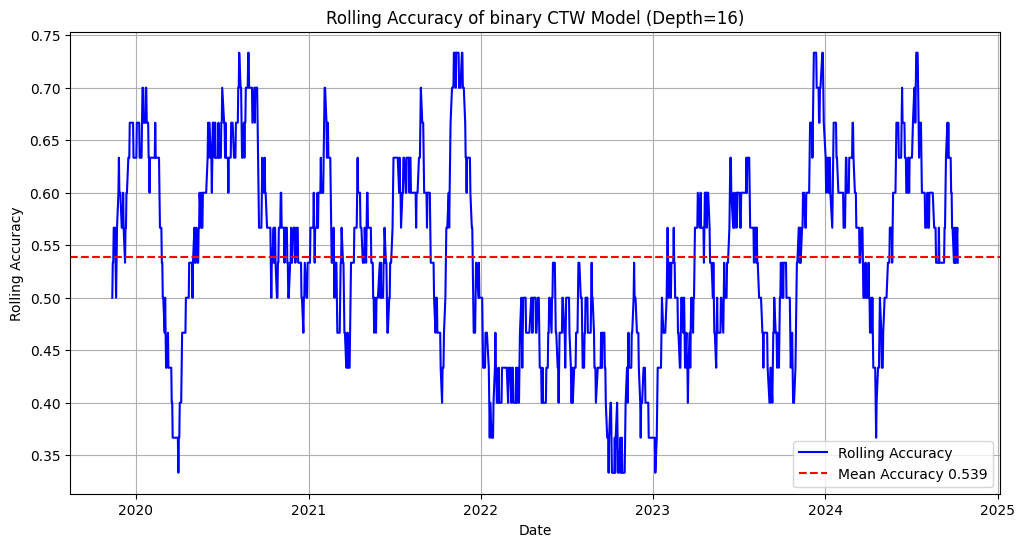

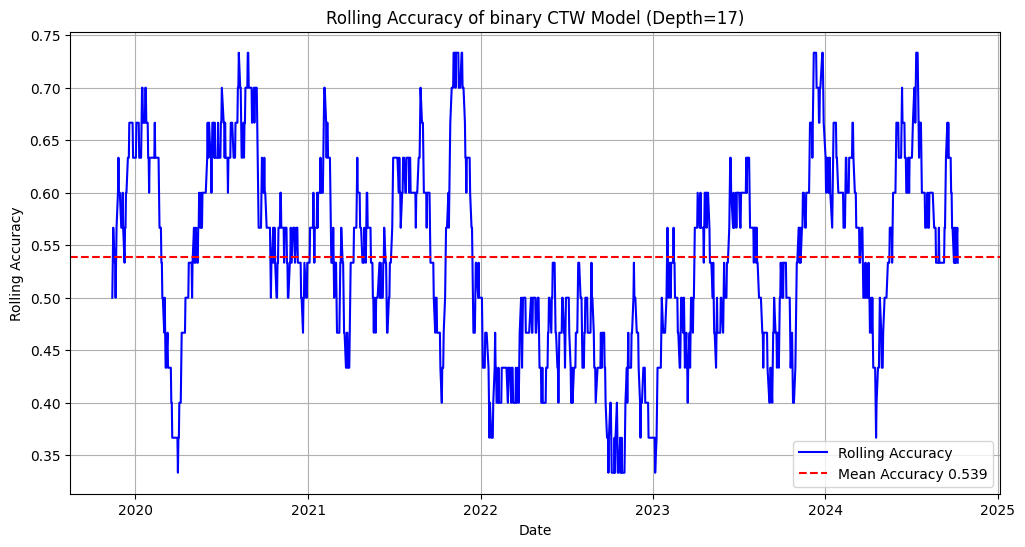

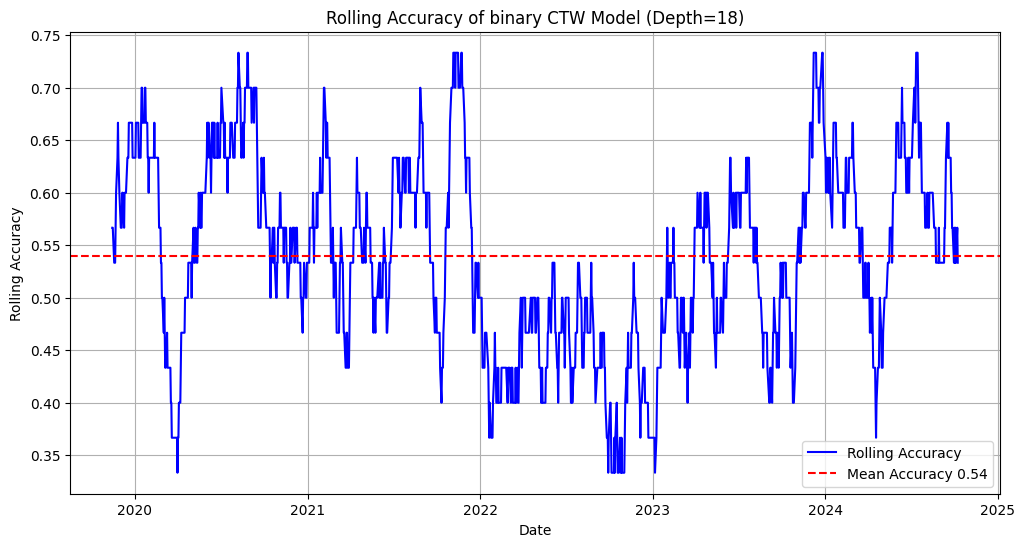

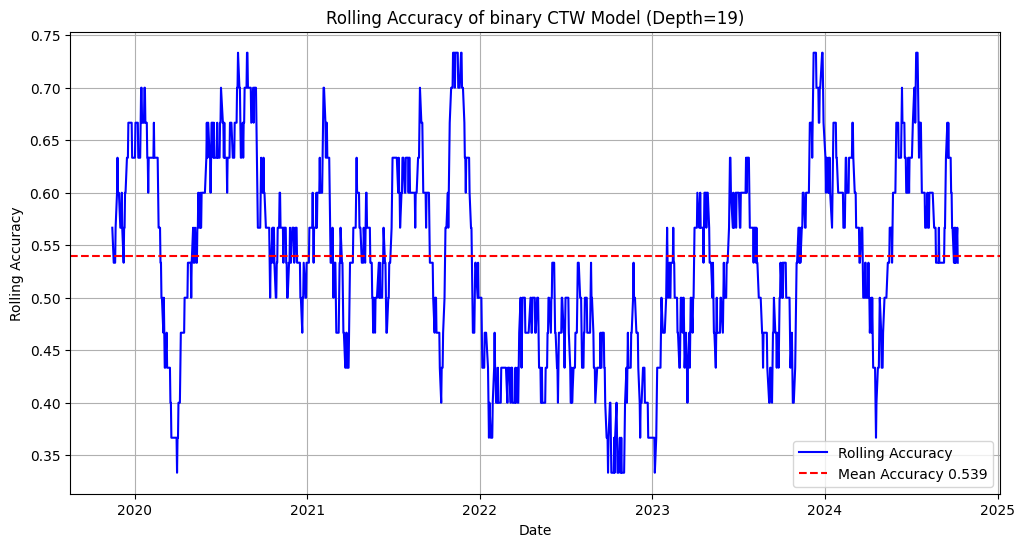

In [23]:
# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

binary=True
if binary:
    df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    max_depth=20
    nb_symbols=2

else:
    max_depth=13
    nb_symbols=3
    # Calculate daily percentage change
    df['Next_Close_temp'] = df['Close'].pct_change()


    # Define the quantile thresholds
    lower_bound = -0.005
    upper_bound = 0.005

    lower_bound = df['Next_Close_temp'].quantile(0.35)# 25th percentile (Q1)
    upper_bound = df['Next_Close_temp'].quantile(0.65)  # 75th percentile (Q3)

    # Classify the movements
    df['Next_Close_Higher'] = 0  # Default to 0
    df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2  # Upper movement
    df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1  # Lower movement


    # Display the first few rows
    print(df.head())

    # Prepare sequence for CTW model
sequence = df['Next_Close_Higher'].values.tolist()

L_binary=[]
depths=[i for i in range(1,max_depth)]
for depth in depths:
    ctw_model = CTW(depth=depth, symbols=nb_symbols)

    # Predict sequence
    distributions = ctw_model.predict_sequence(sequence, sideseq=None)
    predictions = np.argmax(distributions, axis=0)
    
    # Store predictions
    df_predictions = pd.DataFrame({
        'Date': df.index[depth:],  # Align dates
        'Actual': df['Next_Close_Higher'][depth:],  
        'Predicted': predictions
    })
    
    # Rolling window size
    rolling_window = 30  # Adjust as needed
    
    # Compute rolling accuracy
    df_predictions['Rolling_Accuracy'] = df_predictions['Actual'].eq(df_predictions['Predicted']).rolling(rolling_window).mean()
    
    # Plot rolling accuracy over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df_predictions['Date'], y=df_predictions['Rolling_Accuracy'], color='blue', label='Rolling Accuracy')
    plt.axhline(y=df_predictions['Rolling_Accuracy'].mean(), color='red', linestyle='--', label=f'Mean Accuracy {round(df_predictions['Rolling_Accuracy'].mean(),3)}')
    plt.xlabel('Date')
    plt.ylabel('Rolling Accuracy')
    plt.title(f'Rolling Accuracy of binary CTW Model (Depth={depth})')
    plt.legend()
    plt.grid(True)
    plt.show()


## **Binary with Side Sequence**

[*********************100%***********************]  1 of 1 completed


Depth=1, Accuracy=0.5376
Binomial test p-value: 0.0
Permutation test p-value: 0.72
Depth=2, Accuracy=0.5388
Binomial test p-value: 0.0
Permutation test p-value: 0.56
Depth=3, Accuracy=0.5392
Binomial test p-value: 0.0
Permutation test p-value: 0.6
Depth=4, Accuracy=0.5373
Binomial test p-value: 0.0
Permutation test p-value: 0.89
Depth=5, Accuracy=0.5377
Binomial test p-value: 0.0
Permutation test p-value: 0.78
Depth=6, Accuracy=0.5373
Binomial test p-value: 0.0
Permutation test p-value: 0.71
Depth=7, Accuracy=0.5385
Binomial test p-value: 0.0
Permutation test p-value: 0.52
Depth=8, Accuracy=0.5382
Binomial test p-value: 0.0
Permutation test p-value: 0.64
Depth=9, Accuracy=0.5394
Binomial test p-value: 0.0
Permutation test p-value: 0.57
Depth=10, Accuracy=0.5390
Binomial test p-value: 0.0
Permutation test p-value: 0.67
Depth=11, Accuracy=0.5418
Binomial test p-value: 0.0
Permutation test p-value: 0.34


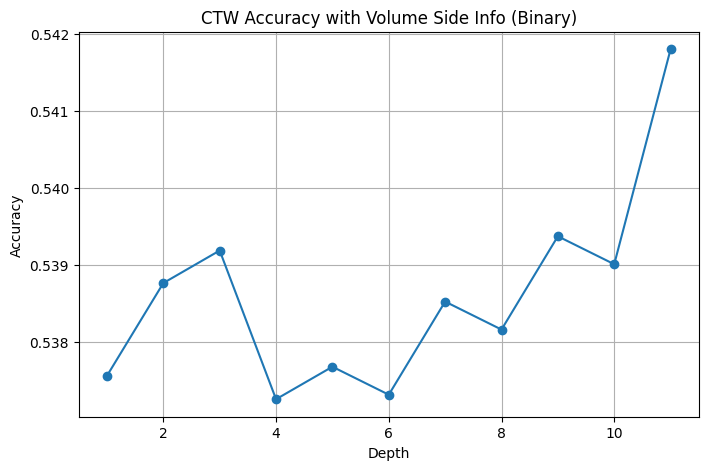

In [24]:
# Define the ticker symbol and date range
ticker = '^GSPC'   # S&P 500 as example
start_date = '2019-09-10'
end_date   = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# Create main sequence (Next_Close_Higher). Example: binary (0/1)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create side sequence for volume (0/1 = volume up/down vs previous day)
df['Side_Volume_Higher'] = (df['Volume'] > df['Volume'].shift(1)).astype(int)
# 3) IntradayUp (compare today's close to today's open)
df['IntradayUp'] = (df[('Close','^GSPC')] > df[('Open','^GSPC')]).astype(int)


# Convert to lists for CTW
sequence = df['Next_Close_Higher'].values.tolist()
side_sequence = df['IntradayUp'].values.tolist()

###############################################################################
# 3) Run CTW with different depths, measure accuracy
###############################################################################
max_depth = 11
nb_symbols = 2  # 2 if you're doing binary (0/1 for next close)
depths = range(1, max_depth+1)
accuracies = []

for depth in depths:
    # Initialize CTW model with side info
    ctw_model = CTW(depth=depth, symbols=nb_symbols, sidesymbols=2, staleness=0)

    # Predict main sequence using side sequence
    distributions = ctw_model.predict_sequence(seq=sequence, sideseq=side_sequence)

    # Convert predicted distributions to class predictions
    predictions = np.argmax(distributions, axis=0)

    # Actual = ground truth for the days after the first 'depth'
    actual = sequence[depth:]  # skip the first 'depth' items
    df_predictions = pd.DataFrame({'Actual': actual, 'Predicted': predictions})

    # Compute accuracy
    accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    accuracies.append(accuracy)
    print(f'Depth={depth}, Accuracy={accuracy:.4f}')
    n = len(df_predictions)
    k = (df_predictions['Actual'] == df_predictions['Predicted']).sum()
    baseline_accuracy = 0.5
    test_result = binomtest(k, n, p=baseline_accuracy, alternative='greater')
    print("Binomial test p-value:", round(test_result.pvalue,2))
    # Let's say 'df_predictions' contains the actual and predicted values:
    observed_accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    num_permutations = 1000
    permuted_accuracies = []
    
    for _ in range(num_permutations):
        # Shuffle the actual labels while keeping predictions fixed
        shuffled_labels = np.random.permutation(df_predictions['Actual'])
        permuted_accuracy = accuracy_score(shuffled_labels, df_predictions['Predicted'])
        permuted_accuracies.append(permuted_accuracy)
    
    # Compute the p-value: fraction of permutations where the permuted accuracy 
    # is greater than or equal to the observed accuracy.
    p_value = np.mean([acc >= observed_accuracy for acc in permuted_accuracies])
    print("Permutation test p-value:", round(p_value,2))


###############################################################################
# 4) Plot results
###############################################################################
plt.figure(figsize=(8,5))
plt.plot(list(depths), accuracies, marker='o')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("CTW Accuracy with Volume Side Info (Binary)")
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


Depth=1, Accuracy=0.5368
Depth=2, Accuracy=0.5380
Depth=3, Accuracy=0.5376
Depth=4, Accuracy=0.5357
Depth=5, Accuracy=0.5361
Depth=6, Accuracy=0.5373
Depth=7, Accuracy=0.5377
Depth=8, Accuracy=0.5374
Depth=9, Accuracy=0.5378
Depth=10, Accuracy=0.5366
Depth=11, Accuracy=0.5402


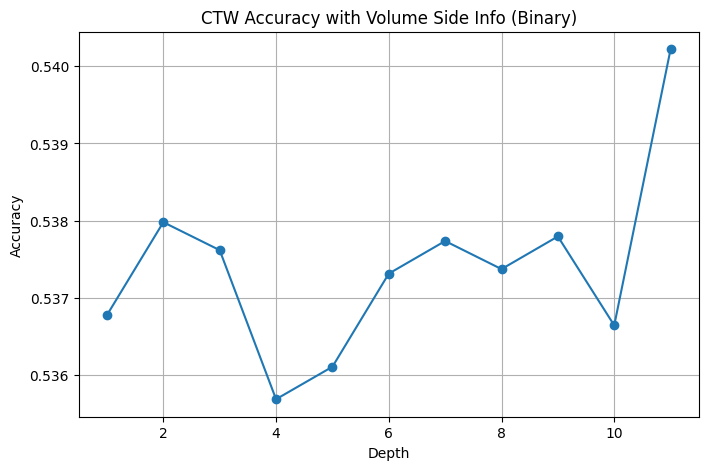

In [25]:
# Define the ticker symbol and date range
ticker = '^GSPC'   # S&P 500 as example
start_date = '2019-09-10'
end_date   = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# Create main sequence (Next_Close_Higher). Example: binary (0/1)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create side sequence for volume (0/1 = volume up/down vs previous day)
df['Side_Volume_Higher'] = (df['Volume'] > df['Volume'].shift(1)).astype(int)


# Convert to lists for CTW
sequence = df['Next_Close_Higher'].values.tolist()
side_sequence = df['Side_Volume_Higher'].values.tolist()

###############################################################################
# 3) Run CTW with different depths, measure accuracy
###############################################################################
max_depth = 11
nb_symbols = 2  # 2 if you're doing binary (0/1 for next close)
depths = range(1, max_depth+1)
accuracies = []

for depth in depths:
    # Initialize CTW model with side info
    ctw_model = CTW(depth=depth, symbols=nb_symbols, sidesymbols=2, staleness=0)

    # Predict main sequence using side sequence
    distributions = ctw_model.predict_sequence(seq=sequence, sideseq=side_sequence)

    # Convert predicted distributions to class predictions
    predictions = np.argmax(distributions, axis=0)

    # Actual = ground truth for the days after the first 'depth'
    actual = sequence[depth:]  # skip the first 'depth' items
    df_predictions = pd.DataFrame({'Actual': actual, 'Predicted': predictions})

    # Compute accuracy
    accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    accuracies.append(accuracy)
    print(f'Depth={depth}, Accuracy={accuracy:.4f}')

###############################################################################
# 4) Plot results
###############################################################################
plt.figure(figsize=(8,5))
plt.plot(list(depths), accuracies, marker='o')
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("CTW Accuracy with Volume Side Info (Binary)")
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


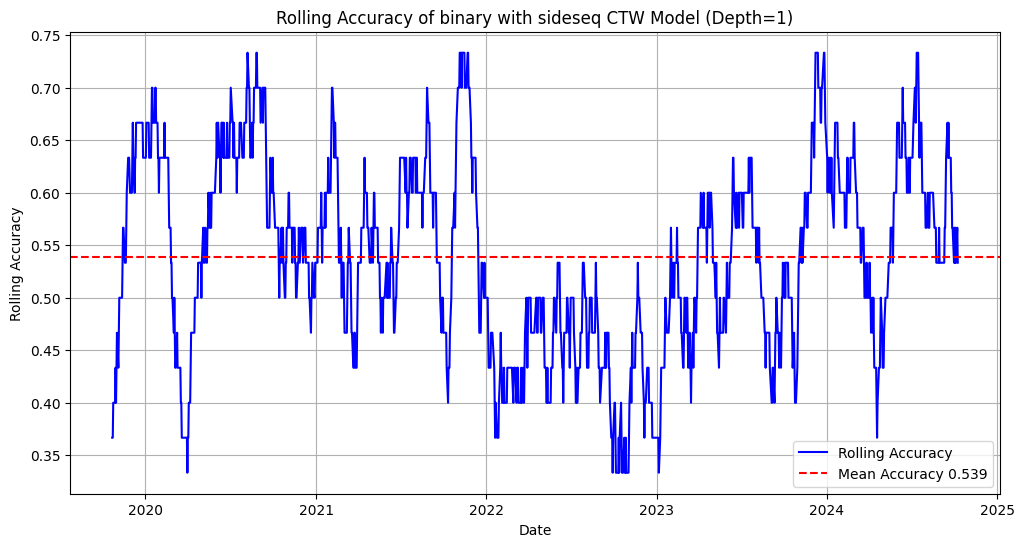

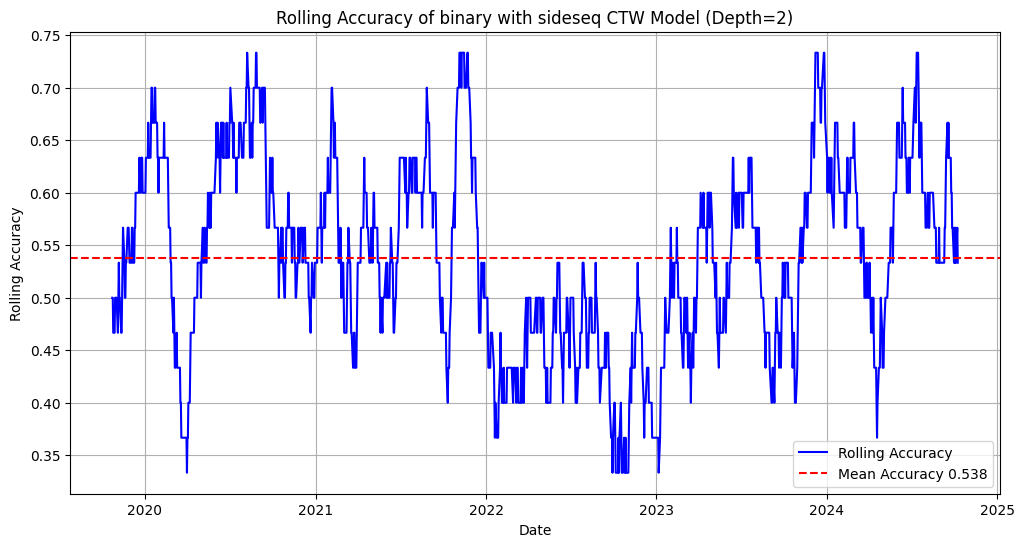

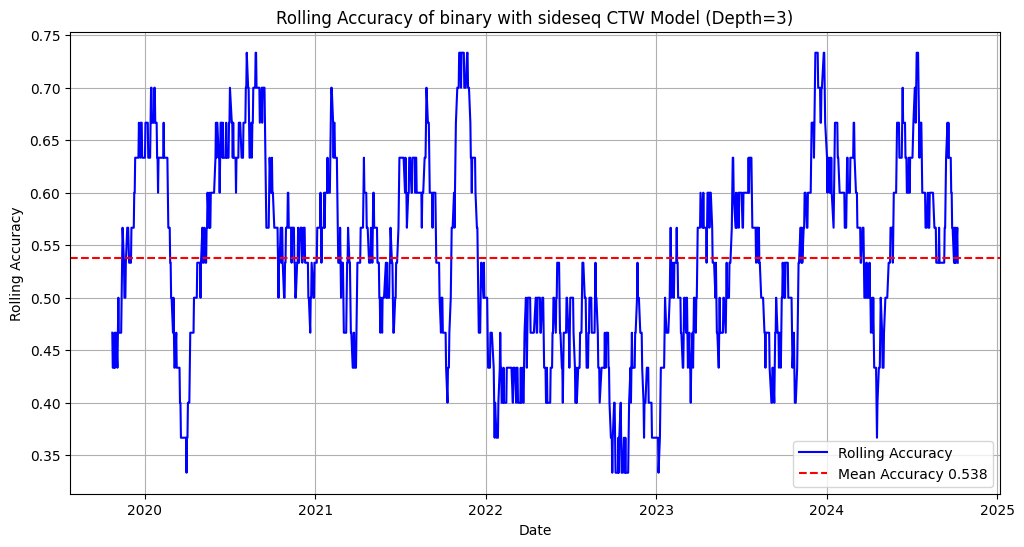

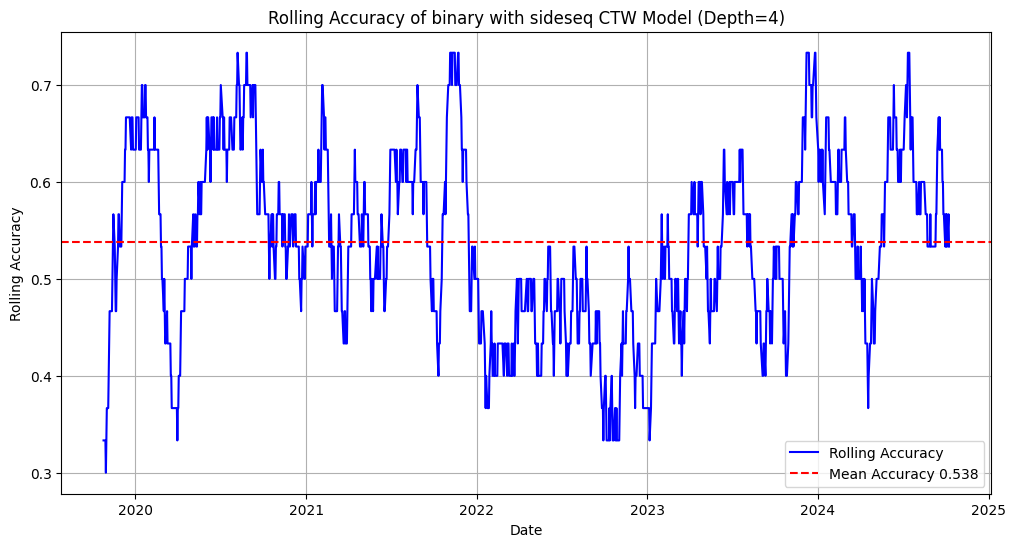

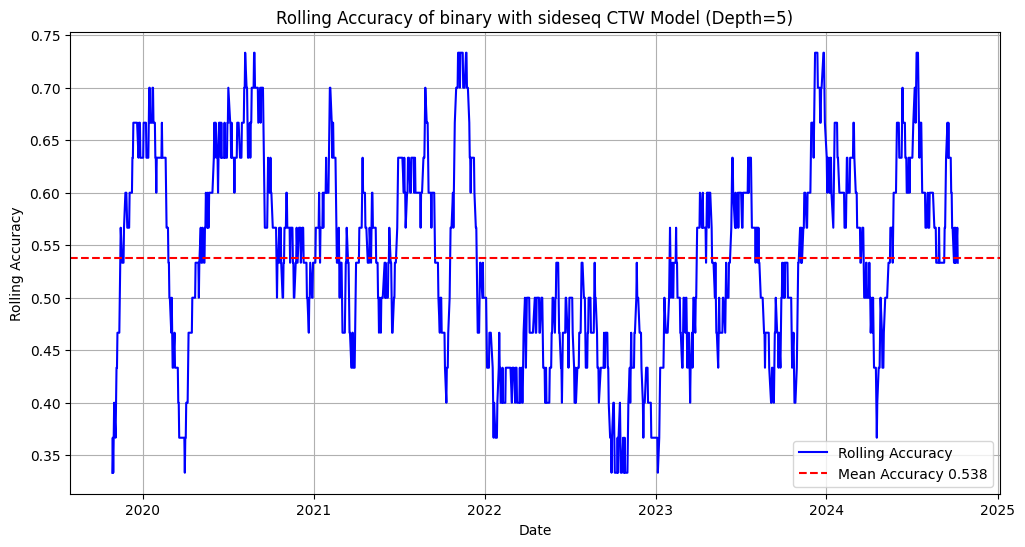

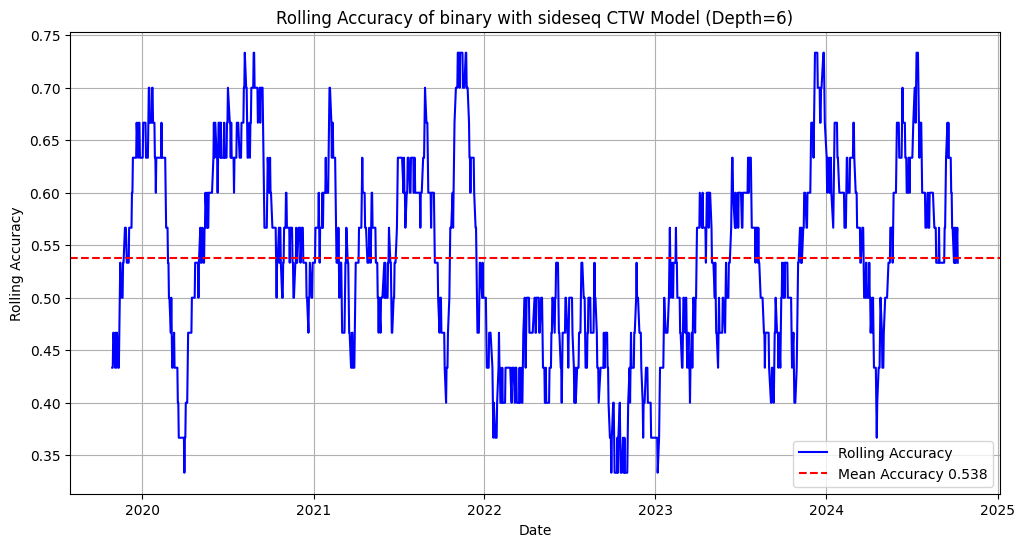

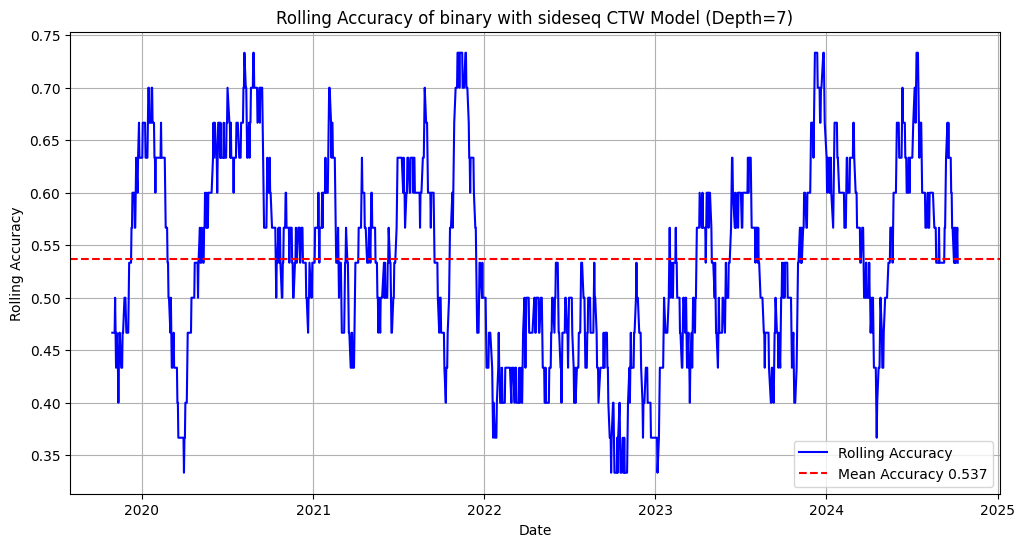

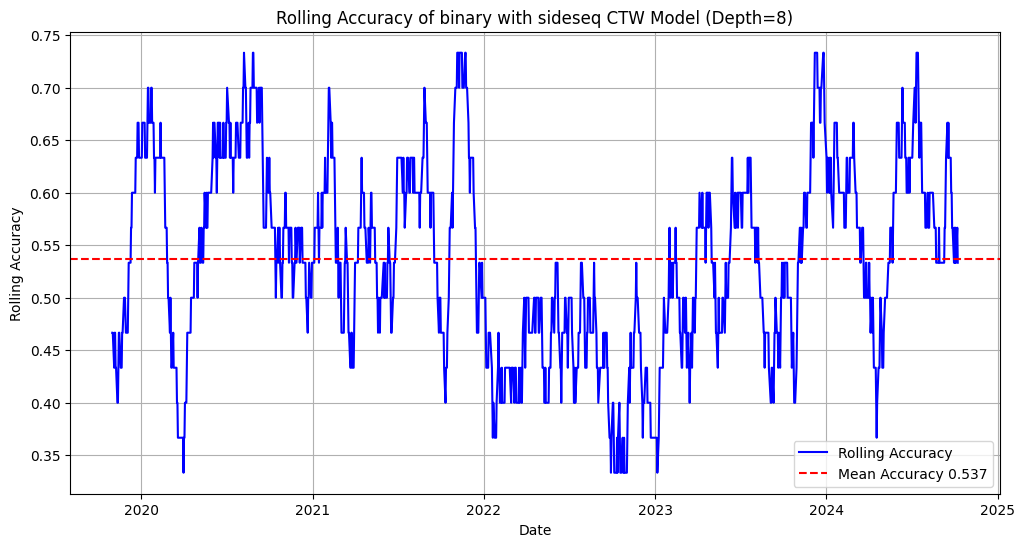

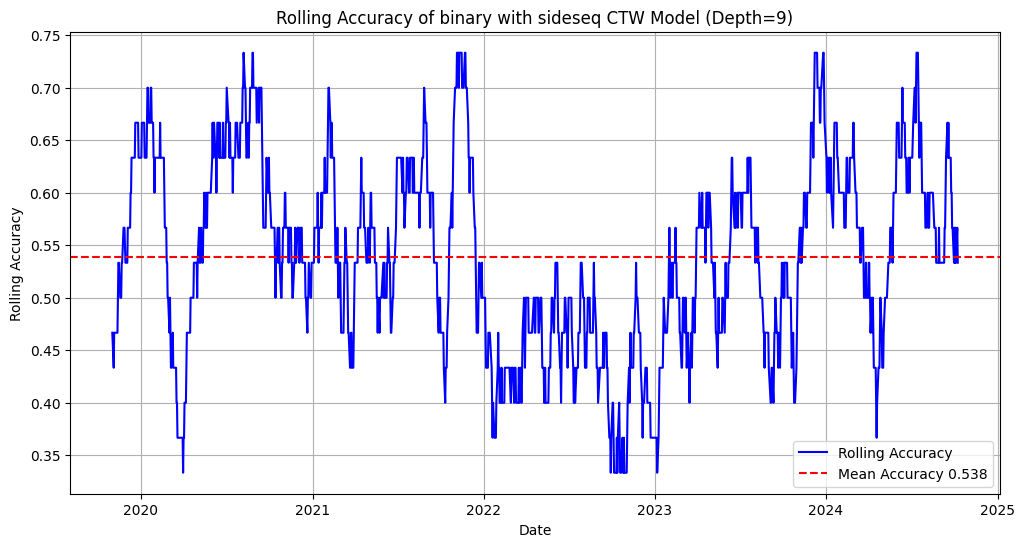

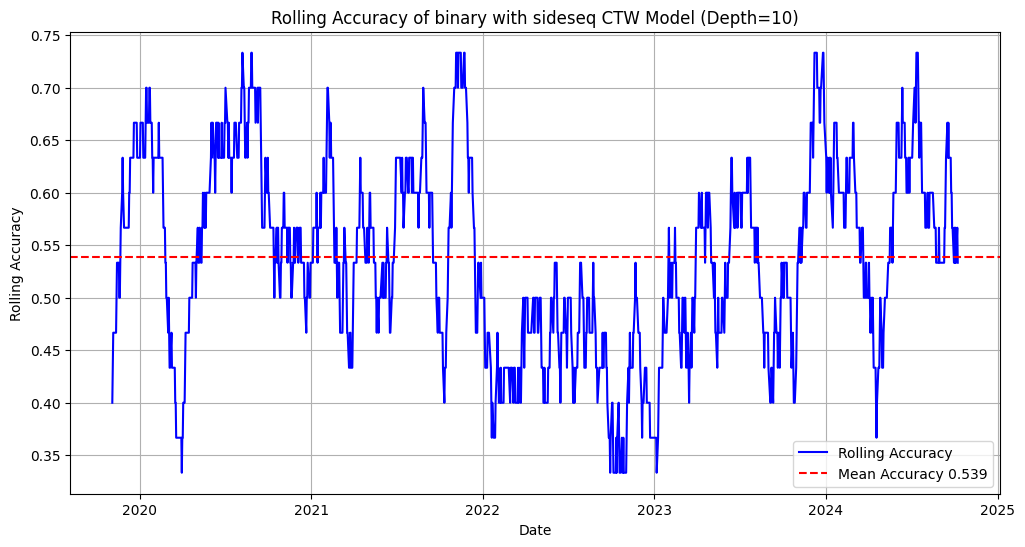

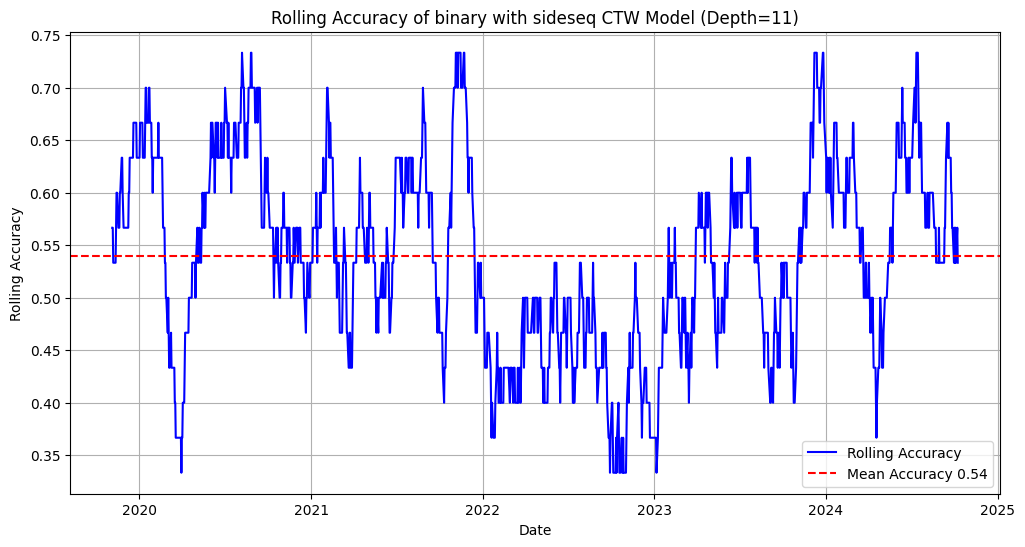

In [26]:
# Define the ticker symbol and date range
ticker = '^GSPC'   # S&P 500 as example
start_date = '2019-09-10'
end_date   = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# Create main sequence (Next_Close_Higher). Example: binary (0/1)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create side sequence for volume (0/1 = volume up/down vs previous day)
df['Side_Volume_Higher'] = (df['Volume'] > df['Volume'].shift(1)).astype(int)


# Convert to lists for CTW
sequence = df['Next_Close_Higher'].values.tolist()
side_sequence = df['Side_Volume_Higher'].values.tolist()

###############################################################################
# 3) Run CTW with different depths, measure accuracy
###############################################################################
max_depth = 11
nb_symbols = 2  # 2 if you're doing binary (0/1 for next close)
depths = range(1, max_depth+1)
accuracies = []

for depth in depths:
    # Initialize CTW model with side info
    ctw_model = CTW(depth=depth, symbols=nb_symbols, sidesymbols=2, staleness=0)

    # Predict main sequence using side sequence
    distributions = ctw_model.predict_sequence(seq=sequence, sideseq=side_sequence)

    predictions = np.argmax(distributions, axis=0)
    
    # Store predictions
    df_predictions = pd.DataFrame({
        'Date': df.index[depth:],  # Align dates
        'Actual': df['Next_Close_Higher'][depth:],  
        'Predicted': predictions
    })
    
    # Rolling window size
    rolling_window = 30  # Adjust as needed
    
    # Compute rolling accuracy
    df_predictions['Rolling_Accuracy'] = df_predictions['Actual'].eq(df_predictions['Predicted']).rolling(rolling_window).mean()
    
    # Plot rolling accuracy over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df_predictions['Date'], y=df_predictions['Rolling_Accuracy'], color='blue', label='Rolling Accuracy')
    plt.axhline(y=df_predictions['Rolling_Accuracy'].mean(), color='red', linestyle='--', label=f'Mean Accuracy {round(df_predictions['Rolling_Accuracy'].mean(),3)}')
    plt.xlabel('Date')
    plt.ylabel('Rolling Accuracy')
    plt.title(f'Rolling Accuracy of binary with sideseq CTW Model (Depth={depth})')
    plt.legend()
    plt.grid(True)
    plt.show()

## **Trinary with side sequence**

# **DL**

In [27]:
# If you're in a notebook and need to install tensorflow:
# %pip install tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


In [28]:
# Define the ticker symbol and date range
ticker = '^GSPC'   # S&P 500 as example
start_date = '2019-09-10'
end_date   = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# Create main sequence (Next_Close_Higher). Example: binary (0/1)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

sequence = df['Next_Close_Higher'].values  # shape (N,)


[*********************100%***********************]  1 of 1 completed


In [29]:
def create_sequences(seq, window_size=10):
    """
    Given a 1D array 'seq', build (X, y) pairs:
      X[i] = seq[i : i+window_size]
      y[i] = seq[i+window_size]
    """
    X, y = [], []
    for i in range(len(seq) - window_size):
        X.append(seq[i : i + window_size])
        y.append(seq[i + window_size])
    X = np.array(X)  # shape => (samples, window_size)
    y = np.array(y)  # shape => (samples,)
    return X, y

window_size = 10  # You can tune this
X, y = create_sequences(sequence, window_size)

# Reshape X for LSTM input: (samples, timesteps, features)
# 'features' = 1 because we only have one binary series
X = X.reshape((X.shape[0], X.shape[1], 1))
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1269, 10, 1)
y shape: (1269,)


In [30]:
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [31]:
model = Sequential()
model.add(LSTM(8, input_shape=(window_size, 1), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


C:\Users\Maxence\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 8)                   │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 329 (1.29 KB)

 Trainable params: 329 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,          # You can tune
    batch_size=32,      # You can tune
    verbose=1
)


Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5116 - loss: 0.6922 - val_accuracy: 0.5354 - val_loss: 0.6904
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5333 - loss: 0.6911 - val_accuracy: 0.5866 - val_loss: 0.6872
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5249 - loss: 0.6904 - val_accuracy: 0.5866 - val_loss: 0.6870
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.6920 - val_accuracy: 0.5866 - val_loss: 0.6876
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 0.6896 - val_accuracy: 0.5866 - val_loss: 0.6852
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5483 - loss: 0.6879 - val_accuracy: 0.5866 - val_loss: 0.6857
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5308 - loss: 0.6897 - val_accuracy: 0.5866 - val_loss: 0.6860
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5318 - loss: 0.6901 - val_accuracy: 0.5866 - val_loss:

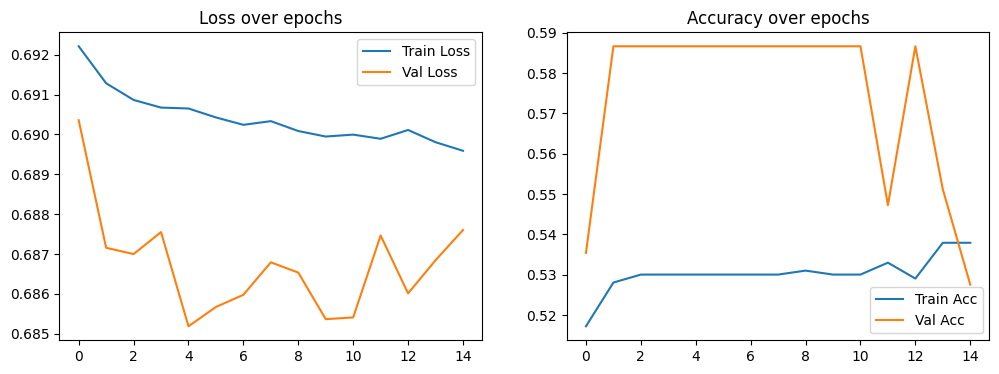

In [33]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()


In [34]:
y_prob = model.predict(X_test)  # shape (num_test_samples, 1)
y_pred = (y_prob >= 0.5).astype(int).flatten()  # => 0 or 1

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Accuracy: 0.5275590551181102


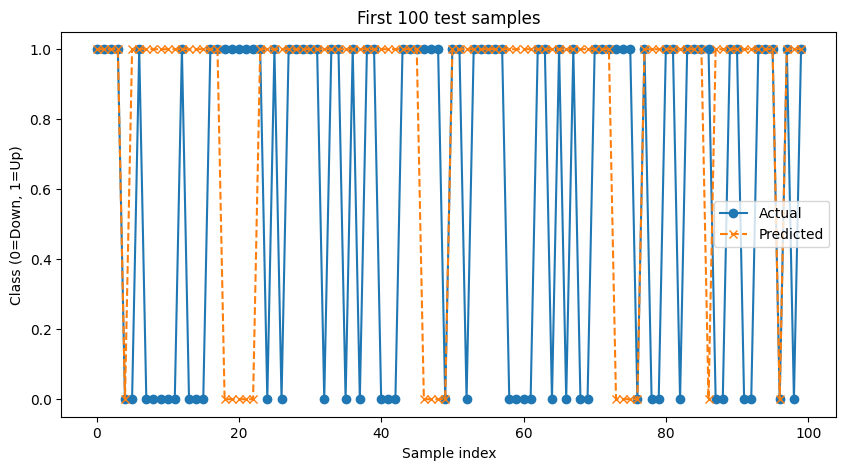

In [35]:
plt.figure(figsize=(10, 5))
samples_to_plot = 100  # how many test samples to show
plt.plot(y_test[:samples_to_plot], 'o-', label='Actual')
plt.plot(y_pred[:samples_to_plot], 'x--', label='Predicted')
plt.title(f'First {samples_to_plot} test samples')
plt.xlabel('Sample index')
plt.ylabel('Class (0=Down, 1=Up)')
plt.legend()
plt.show()


# **ML**

[*********************100%***********************]  1 of 1 completed


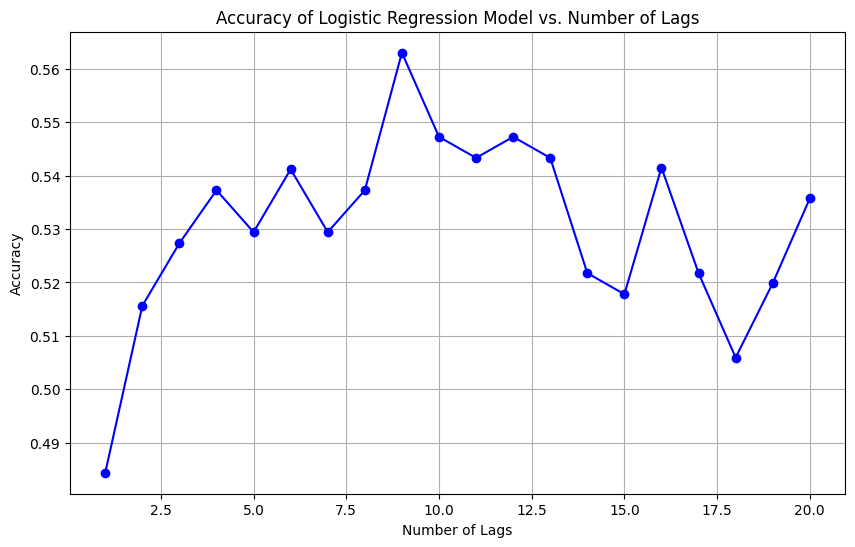

Accuracy with 1 lags: 0.4844
Accuracy with 2 lags: 0.5156
Accuracy with 3 lags: 0.5273
Accuracy with 4 lags: 0.5373
Accuracy with 5 lags: 0.5294
Accuracy with 6 lags: 0.5412
Accuracy with 7 lags: 0.5294
Accuracy with 8 lags: 0.5373
Accuracy with 9 lags: 0.5630
Accuracy with 10 lags: 0.5472
Accuracy with 11 lags: 0.5433
Accuracy with 12 lags: 0.5472
Accuracy with 13 lags: 0.5433
Accuracy with 14 lags: 0.5217
Accuracy with 15 lags: 0.5178
Accuracy with 16 lags: 0.5415
Accuracy with 17 lags: 0.5217
Accuracy with 18 lags: 0.5059
Accuracy with 19 lags: 0.5198
Accuracy with 20 lags: 0.5357


In [36]:
# Define the ticker symbol and date range
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

# Fetch the data
df = yf.download(ticker, start=start_date, end=end_date)

# Add the 'Next_Close_Higher' column (binary classification target)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create a list to store accuracy results for different numbers of lags
lag_accuracies = []

max_lags = 20

for lag_days in range(1, max_lags + 1):
    for lag in range(1, lag_days + 1):
        df[f'Lag_{lag}'] = df['Next_Close_Higher'].shift(lag)
    
    df_lags = df.dropna()

    X = df_lags[[f'Lag_{lag}' for lag in range(1, lag_days + 1)]]
    y = df_lags['Next_Close_Higher']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    
    lag_accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lags + 1), lag_accuracies, marker='o', color='b')
plt.title('Accuracy of Logistic Regression Model vs. Number of Lags')
plt.xlabel('Number of Lags')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

for lag, accuracy in zip(range(1, max_lags + 1), lag_accuracies):
    print(f'Accuracy with {lag} lags: {accuracy:.4f}')


[*********************100%***********************]  1 of 1 completed


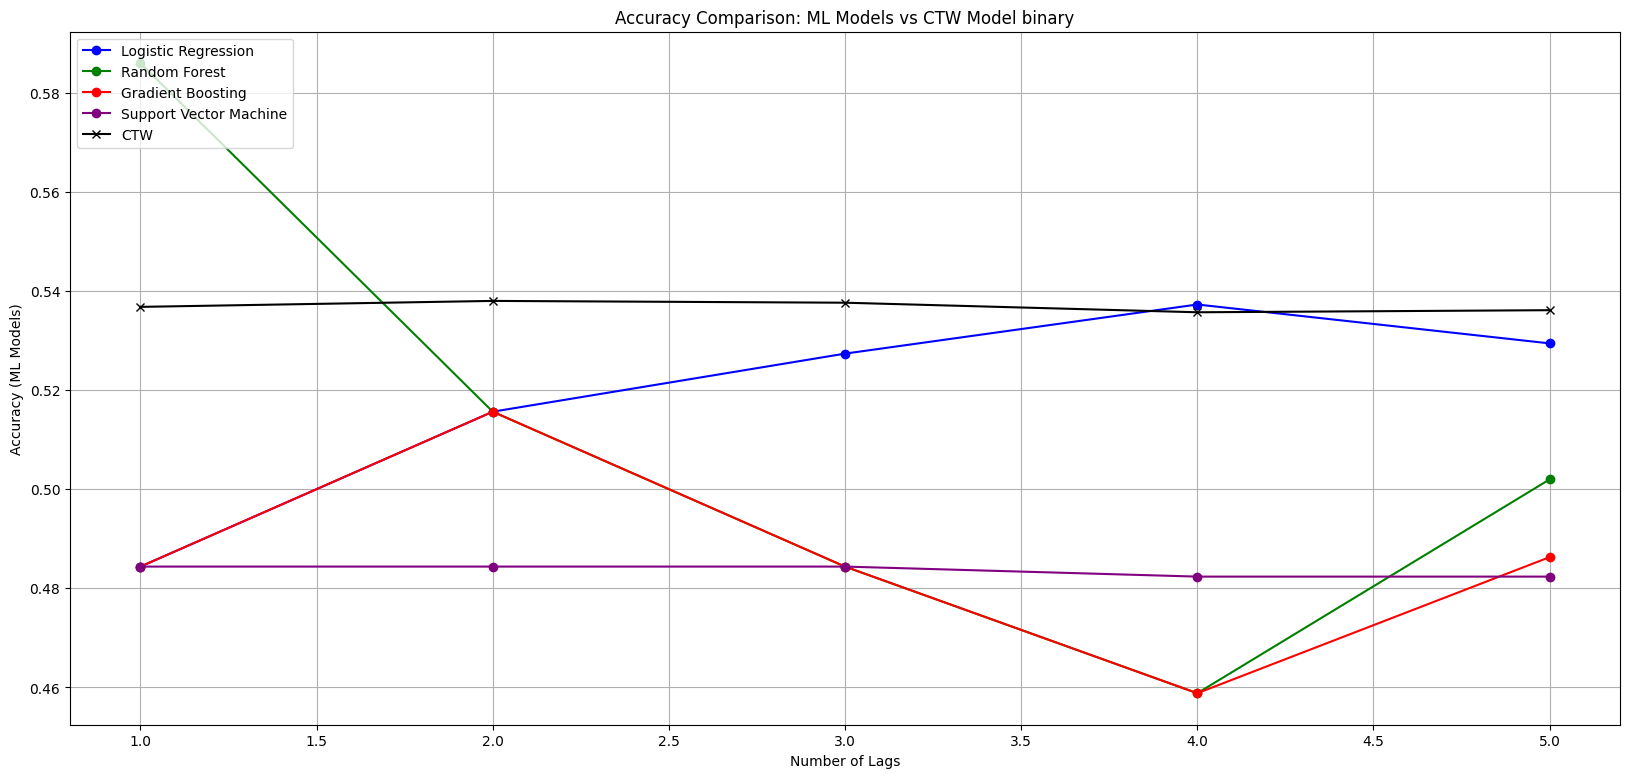

In [37]:
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# Create main sequence (Next_Close_Higher). Example: binary (0/1)
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Create side sequence for volume (0/1 = volume up/down vs previous day)
df['Side_Volume_Higher'] = (df['Volume'] > df['Volume'].shift(1)).astype(int)


# Convert to lists for CTW
sequence = df['Next_Close_Higher'].values.tolist()
side_sequence = df['Side_Volume_Higher'].values.tolist()

lag_accuracies_lr = []
lag_accuracies_rf = []
lag_accuracies_gb = []
lag_accuracies_svm = []
lag_accuracies_CWT = []

max_lags = 5

for lag_days in range(1, max_lags + 1):
    for lag in range(1, lag_days + 1):
        df[f'Lag_{lag}'] = df['Next_Close_Higher'].shift(lag)
    
    df_lags = df.dropna()

    X = df_lags[[f'Lag_{lag}' for lag in range(1, lag_days + 1)]]
    y = df_lags['Next_Close_Higher']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model_lr = LogisticRegression(max_iter=1000)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    lag_accuracies_lr.append(accuracy_lr)

    model_rf = RandomForestClassifier(n_estimators=100)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    lag_accuracies_rf.append(accuracy_rf)

    model_gb = GradientBoostingClassifier(n_estimators=100)
    model_gb.fit(X_train, y_train)
    y_pred_gb = model_gb.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    lag_accuracies_gb.append(accuracy_gb)

    model_svm = SVC(kernel='linear')
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    lag_accuracies_svm.append(accuracy_svm)


    ctw_model = CTW(depth=lag, symbols=nb_symbols, sidesymbols=2, staleness=0)
    distributions = ctw_model.predict_sequence(seq=sequence, sideseq=side_sequence)
    predictions = np.argmax(distributions, axis=0)
    actual = sequence[lag:]  # skip the first 'depth' items
    df_predictions = pd.DataFrame({'Actual': actual, 'Predicted': predictions})
    accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    lag_accuracies_CWT.append(accuracy)

fig, ax1 = plt.subplots(figsize=(20, 9))
plt.plot(range(1, max_lags + 1), lag_accuracies_lr, marker='o', label='Logistic Regression', color='blue')
plt.plot(range(1, max_lags + 1), lag_accuracies_rf, marker='o', label='Random Forest', color='green')
plt.plot(range(1, max_lags + 1), lag_accuracies_gb, marker='o', label='Gradient Boosting', color='red')
plt.plot(range(1, max_lags + 1), lag_accuracies_svm, marker='o', label='Support Vector Machine', color='purple')

ax1.set_xlabel('Number of Lags')
ax1.set_ylabel('Accuracy (ML Models)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax1.plot(range(1, len(lag_accuracies_CWT) + 1), lag_accuracies_CWT, marker='x', color='black', label='CTW')

plt.title('Accuracy Comparison: ML Models vs CTW Model binary')
ax1.legend(loc='upper left')

plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


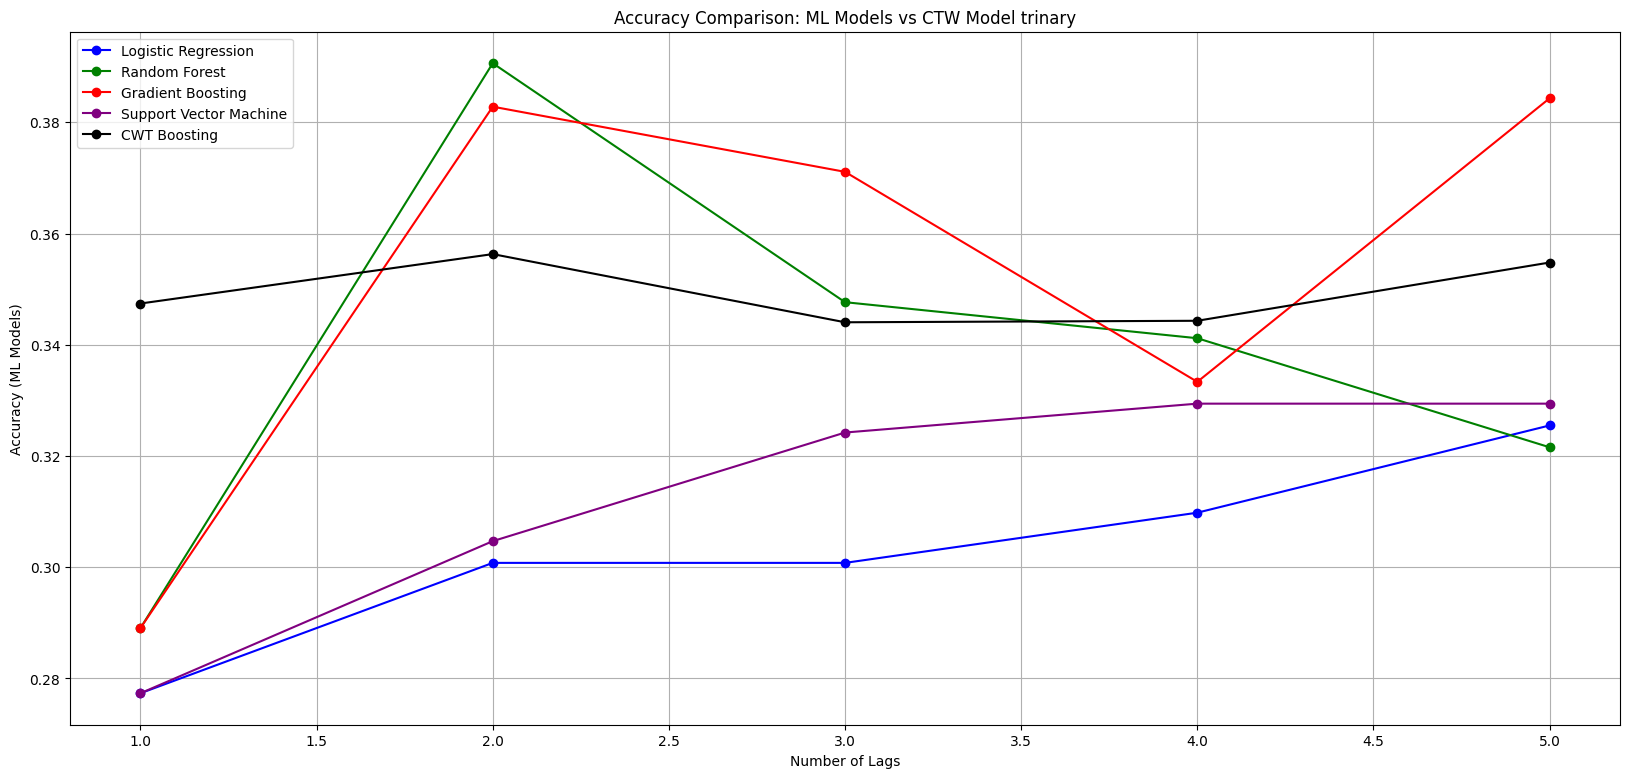

In [38]:
ticker = '^GSPC'
start_date = '2019-09-10'
end_date = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

max_depth=13
nb_symbols=3

df['Next_Close_temp'] = df['Close'].pct_change()


# Define the quantile thresholds
lower_bound = -0.005
upper_bound = 0.005

lower_bound = df['Next_Close_temp'].quantile(0.35)# 25th percentile (Q1)
upper_bound = df['Next_Close_temp'].quantile(0.65)  # 75th percentile (Q3)

# Classify the movements
df['Next_Close_Higher'] = 0  # Default to 0
df.loc[df['Next_Close_temp'] > upper_bound, 'Next_Close_Higher'] = 2  # Upper movement
df.loc[df['Next_Close_temp'] < lower_bound, 'Next_Close_Higher'] = 1  # Lower movement

lag_accuracies_lr = []
lag_accuracies_rf = []
lag_accuracies_gb = []
lag_accuracies_svm = []
lag_accuracies_CWT = []
sequence = df['Next_Close_Higher'].values.tolist()

max_lags = 5

for lag_days in range(1, max_lags + 1):
    for lag in range(1, lag_days + 1):
        df[f'Lag_{lag}'] = df['Next_Close_Higher'].shift(lag)
    
    df_lags = df.dropna()

    X = df_lags[[f'Lag_{lag}' for lag in range(1, lag_days + 1)]]
    y = df_lags['Next_Close_Higher']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    model_lr = LogisticRegression(max_iter=1000)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    lag_accuracies_lr.append(accuracy_lr)

    model_rf = RandomForestClassifier(n_estimators=100)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    lag_accuracies_rf.append(accuracy_rf)

    model_gb = GradientBoostingClassifier(n_estimators=100)
    model_gb.fit(X_train, y_train)
    y_pred_gb = model_gb.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    lag_accuracies_gb.append(accuracy_gb)

    model_svm = SVC(kernel='linear')
    model_svm.fit(X_train, y_train)
    y_pred_svm = model_svm.predict(X_test)
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    lag_accuracies_svm.append(accuracy_svm)

    ctw_model = CTW(depth=lag, symbols=3)
    distributions = ctw_model.predict_sequence(seq=sequence,sideseq=None)
    predictions = np.argmax(distributions, axis=0)
    actual = sequence[lag:]  # skip the first 'depth' items
    df_predictions = pd.DataFrame({'Actual': actual, 'Predicted': predictions})
    accuracy = accuracy_score(df_predictions['Actual'], df_predictions['Predicted'])
    lag_accuracies_CWT.append(accuracy)

fig, ax1 = plt.subplots(figsize=(20, 9))
plt.plot(range(1, max_lags + 1), lag_accuracies_lr, marker='o', label='Logistic Regression', color='blue')
plt.plot(range(1, max_lags + 1), lag_accuracies_rf, marker='o', label='Random Forest', color='green')
plt.plot(range(1, max_lags + 1), lag_accuracies_gb, marker='o', label='Gradient Boosting', color='red')
plt.plot(range(1, max_lags + 1), lag_accuracies_svm, marker='o', label='Support Vector Machine', color='purple')
plt.plot(range(1, max_lags + 1), lag_accuracies_CWT, marker='o', label='CWT Boosting', color='black')

ax1.set_xlabel('Number of Lags')
ax1.set_ylabel('Accuracy (ML Models)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

plt.title('Accuracy Comparison: ML Models vs CTW Model trinary')
ax1.legend(loc='upper left')

plt.grid(True)
plt.show()

# **RL**

## **PPO**

In [39]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import gym
from gym import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# ================================================
# 2) LOAD DATA, CREATE LABEL + SIDE LABEL
# ================================================
ticker = '^GSPC'
start_date = '2019-09-10'
end_date   = '2024-10-09'

df = yf.download(ticker, start=start_date, end=end_date)

# Primary binary label: Next_Close_Higher
df['Next_Close_Higher'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Side (Volume up vs previous day)
df['Side_Volume_Higher'] = (df['Volume'] > df['Volume'].shift(1)).astype(int)

# Drop any initial NaNs
df.dropna(inplace=True)

# Convert entire columns to lists for the CTW usage
sequence = df['Next_Close_Higher'].tolist()    # main sequence
side_seq = df['Side_Volume_Higher'].tolist()   # side sequence

# We'll define a train/test split by index
split_index = int(len(df) * 0.8)
df_train = df.iloc[:split_index]
df_test  = df.iloc[split_index:]

# For reference, the ground-truth test labels:
y_test_full = df_test['Next_Close_Higher'].values

print("Train size:", len(df_train), "  Test size:", len(df_test))

# ================================================
# 3) TRAIN ML MODELS & GENERATE PREDICTIONS (PER LAG)
# ================================================
max_lags = 5
# We'll store test-set predictions for each "lag + model" in a big list
# Later we will horizontally stack them => shape (num_test_days, 25)
preds_collection = []
model_names = []  # Just to keep track of which column is which

# We'll iterate lags = 1..5
for lag_days in range(1, max_lags + 1):
    # 3.1) Create lag features for TRAIN
    df_train_lag = df_train.copy()
    for lag in range(1, lag_days + 1):
        df_train_lag[f'Lag_{lag}'] = df_train_lag['Next_Close_Higher'].shift(lag)
    df_train_lag.dropna(inplace=True)
    
    X_train_lag = df_train_lag[[f'Lag_{lag}' for lag in range(1, lag_days + 1)]]
    y_train_lag = df_train_lag['Next_Close_Higher'].values

    # 3.2) Create lag features for TEST (align day by day with the same offset)
    df_test_lag = df_test.copy()
    for lag in range(1, lag_days + 1):
        df_test_lag[f'Lag_{lag}'] = df_test_lag['Next_Close_Higher'].shift(lag)
    df_test_lag.dropna(inplace=True)

    X_test_lag = df_test_lag[[f'Lag_{lag}' for lag in range(1, lag_days + 1)]]
    y_test_lag = df_test_lag['Next_Close_Higher'].values  # day-by-day test labels for that lag
    
    # If the test set shrinks differently for each lag, we must align carefully later.
    # We'll store these predictions in the same shape and handle alignment at the end.
    
    # ----------- 3.3) Train the 4 ML models and get predictions -----------
    # Logistic Regression
    model_lr = LogisticRegression(max_iter=1000)
    model_lr.fit(X_train_lag, y_train_lag)
    pred_lr = model_lr.predict(X_test_lag)
    preds_collection.append(pred_lr)
    model_names.append(f"LR_lag{lag_days}")
    
    # Random Forest
    model_rf = RandomForestClassifier(n_estimators=100)
    model_rf.fit(X_train_lag, y_train_lag)
    pred_rf = model_rf.predict(X_test_lag)
    preds_collection.append(pred_rf)
    model_names.append(f"RF_lag{lag_days}")
    
    # Gradient Boosting
    model_gb = GradientBoostingClassifier(n_estimators=100)
    model_gb.fit(X_train_lag, y_train_lag)
    pred_gb = model_gb.predict(X_test_lag)
    preds_collection.append(pred_gb)
    model_names.append(f"GB_lag{lag_days}")
    
    # SVM
    model_svm = SVC(kernel='linear')
    model_svm.fit(X_train_lag, y_train_lag)
    pred_svm = model_svm.predict(X_test_lag)
    preds_collection.append(pred_svm)
    model_names.append(f"SVM_lag{lag_days}")
    train_seq  = sequence[:split_index]   # main
    train_side = side_seq[:split_index]   # side

    ctw_model = CTW(depth=lag, symbols=2, sidesymbols=2, staleness=0)

    # Predict main sequence using side sequence
    distributions = ctw_model.predict_sequence(seq=sequence, sideseq=side_sequence)

    # Convert predicted distributions to class predictions
    pred_ctw = np.argmax(distributions, axis=0)

    #
    # Actually append them:
    preds_collection.append(pred_ctw)
    model_names.append(f"CTW_lag{lag_days}")

# We now have 25 arrays in `preds_collection`, each array shape ~ (some_test_length,)
# But note each array might differ in length if dropping naive rows differs by lag.
# We must figure out a consistent alignment so that row i is the same day for all 25 combos.
#
# Easiest approach: pick the smallest # of test rows across all lags and slice from the end.

min_test_len = min(pred.shape[0] for pred in preds_collection)
print("Minimum test length across all lags:", min_test_len)

# We'll align them by taking the *last* min_test_len predictions from each array,
# ensuring we refer to the same final chunk of each test set.
aligned_preds = [pred[-min_test_len:] for pred in preds_collection]

# For the ground truth, we also take the last min_test_len from df_test (or df_test_lag).
# Because we have a single "df_test" but each lag might have dropped some rows,
# let's take the final min_test_len from the "global" test label array:
y_test_full_aligned = y_test_full[-min_test_len:]

# Finally, stack horizontally => shape (min_test_len, 25)
all_predictions_test = np.column_stack(aligned_preds)
print("all_predictions_test shape:", all_predictions_test.shape)  # (N, 25)
print("Aligned y_test shape:       ", y_test_full_aligned.shape)


[*********************100%***********************]  1 of 1 completed


Train size: 1023   Test size: 256
Minimum test length across all lags: 251
all_predictions_test shape: (251, 25)
Aligned y_test shape:        (251,)


In [40]:
class ModelSelectionEnv(gym.Env):
    """
    Each timestep = 1 day in the test set (aligned).
    Action space: pick among 25 possible "lag+model" combos.
    Reward = 1 if the chosen model is correct on that day, else 0.
    """
    def __init__(self, all_preds, true_labels):
        super(ModelSelectionEnv, self).__init__()
        
        self.all_preds = all_preds   # shape = (num_days, 25)
        self.true = true_labels      # shape = (num_days,)
        
        self.num_days   = self.all_preds.shape[0]
        self.num_models = self.all_preds.shape[1]  # 25
        
        self.action_space      = spaces.Discrete(self.num_models)
        self.observation_space = spaces.Discrete(self.num_days)  # We'll just use day index as 'state'
        
        self.current_day = 0

    def reset(self):
        self.current_day = 0
        return self.current_day

    def step(self, action):
        # action in [0..24]
        chosen_pred = self.all_preds[self.current_day, action]
        true_label  = self.true[self.current_day]
        
        reward = 1.0 if chosen_pred == true_label else 0.0
        
        self.current_day += 1
        done = (self.current_day >= self.num_days)
        
        return self.current_day, reward, done, {}


In [41]:
# ================================================
# 5) TRAIN A PPO AGENT
# ================================================
env = ModelSelectionEnv(all_predictions_test, y_test_full_aligned)
vec_env = DummyVecEnv([lambda: env])

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=5000)  # Increase for more training

# ================================================
# 6) EVALUATE THE RL POLICY
# ================================================
obs = vec_env.reset()
cumulative_reward = 0.0
done = False
steps = 0

while not done:
    action, _ = model.predict(obs)
    obs, reward, done, info = vec_env.step(action)
    cumulative_reward += reward
    steps += 1

avg_reward = cumulative_reward[0] / steps
print(f"RL agent total correct picks: {cumulative_reward[0]}")
print(f"RL agent average accuracy:    {avg_reward:.3f}")

# OPTIONAL: Compare with best single column
best_model_accuracy = 0.0
for i, col_name in enumerate(model_names):
    col_preds = all_predictions_test[:, i]
    acc = (col_preds == y_test_full_aligned).mean()
    best_model_accuracy = max(best_model_accuracy, acc)

print(f"Best single model-lag accuracy in test: {best_model_accuracy:.3f}")

Using cpu device


C:\Users\Maxence\PycharmProjects\pythonProject\.venv\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 2301 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1569        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.001875031 |
|    clip_fraction        | 0.000488    |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.22       |
|    explained_variance   | -0.00276    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.509       |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00843    |
|    value_loss           | 28.9        |
-----------------------------------------
----------------------------------

RL agent final accuracy (from day-by-day trace): 0.538
Best single model-lag: CTW_lag1
Best single accuracy:  0.582


C:\Users\Maxence\AppData\Local\Temp\ipykernel_4288\632037289.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  chosen_actions.append(int(action))


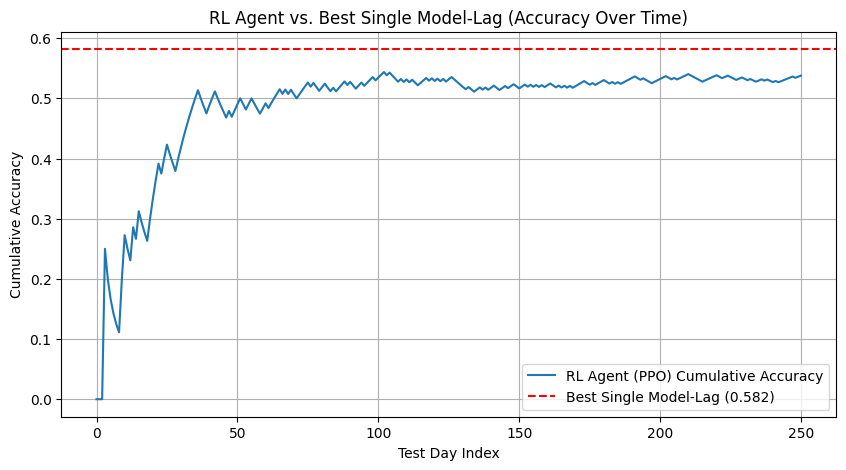

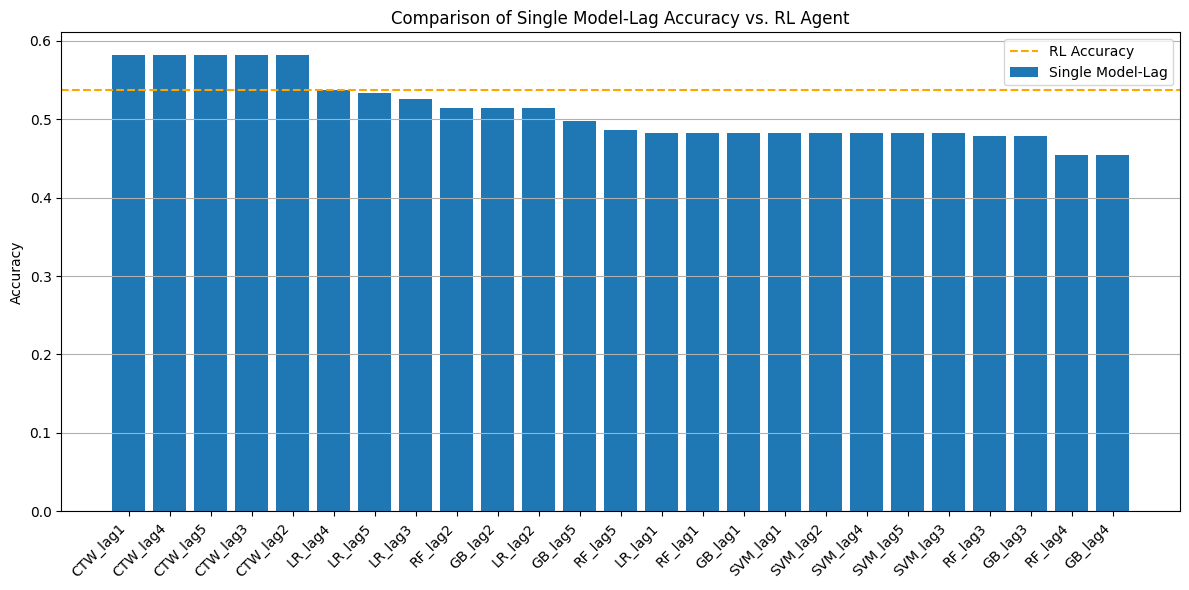

DayIndex  ChosenAction  AgentPred  Actual  Reward  CumulativeCorrect  \
241       241             3          1       1     1.0              128.0   
242       242            14          1       0     0.0              128.0   
243       243            13          1       1     1.0              129.0   
244       244            23          0       0     1.0              130.0   
245       245            17          1       1     1.0              131.0   
246       246             8          0       0     1.0              132.0   
247       247             8          1       1     1.0              133.0   
248       248            16          1       0     0.0              133.0   
249       249             1          1       1     1.0              134.0   
250       250            13          0       0     1.0              135.0   

     CumulativeAccuracy  
241            0.528926  
242            0.526749  
243            0.528689  
244            0.530612  
245            0.532520  
246            0.534413  
247            0.536290  
248            0.534137  
249            0.536000  
250            0.537849

In [42]:
# ================================================
# 7) COLLECT DAY-BY-DAY ACTIONS AND PREDICTIONS
# ================================================
obs = vec_env.reset()
done = False

chosen_actions = []
rewards_list   = []  # Keep track of reward each day (1 if correct, 0 if not)

while not done:
    action, _ = model.predict(obs)
    # action is the index of which column in all_predictions_test is chosen
    chosen_actions.append(int(action))
    obs, reward, done, info = vec_env.step(action)
    # 'reward' is a numpy array from the vec_env, so take reward[0]
    rewards_list.append(float(reward[0]))

# Convert chosen_actions into day-by-day predictions
# For day i, the agent picks 'chosen_actions[i]' => use all_predictions_test[i, that_action].
agent_predictions = [
    all_predictions_test[i, chosen_actions[i]] for i in range(len(chosen_actions))
]

# Build a DataFrame to store day-by-day results
results_df = pd.DataFrame({
    'DayIndex': np.arange(len(chosen_actions)),
    'ChosenAction': chosen_actions,
    'AgentPred': agent_predictions,
    'Actual': y_test_full_aligned[:len(chosen_actions)],
    'Reward': rewards_list
})

# Accuracy at each day is cumulative up to that point
results_df['CumulativeCorrect'] = results_df['Reward'].cumsum()
results_df['CumulativeAccuracy'] = results_df['CumulativeCorrect'] / (results_df.index + 1)

# Final accuracy from the RL agent (should match what you printed earlier)
final_accuracy_rl = results_df['CumulativeAccuracy'].iloc[-1]
print(f"RL agent final accuracy (from day-by-day trace): {final_accuracy_rl:.3f}")

# ================================================
# 8) COMPARE WITH BEST SINGLE MODEL-LAG
# ================================================
# You already computed this, but let's reconfirm:
accuracies_single = []
for i, col_name in enumerate(model_names):
    col_preds = all_predictions_test[:, i]
    acc = (col_preds == y_test_full_aligned).mean()
    accuracies_single.append(acc)

best_single_acc = max(accuracies_single)
best_arm_index  = np.argmax(accuracies_single)
print(f"Best single model-lag: {model_names[best_arm_index]}")
print(f"Best single accuracy:  {best_single_acc:.3f}")

# ================================================
# 9) VISUALIZE 1: Agent's Cumulative Accuracy Over Time
# ================================================
plt.figure(figsize=(10,5))

plt.plot(
    results_df['DayIndex'], 
    results_df['CumulativeAccuracy'],
    label='RL Agent (PPO) Cumulative Accuracy'
)
# Add a horizontal line for the best single model-lag
plt.axhline(
    best_single_acc, 
    color='red', 
    linestyle='--', 
    label=f'Best Single Model-Lag ({best_single_acc:.3f})'
)

plt.title("RL Agent vs. Best Single Model-Lag (Accuracy Over Time)")
plt.xlabel("Test Day Index")
plt.ylabel("Cumulative Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ================================================
# 10) VISUALIZE 2: Bar Chart of All Model-Lags vs. RL
# ================================================
model_lag_df = pd.DataFrame({
    'ModelLag': model_names,
    'Accuracy': accuracies_single
})

# Sort by descending accuracy so the bar chart is easier to read
model_lag_df.sort_values(by='Accuracy', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
plt.bar(model_lag_df['ModelLag'], model_lag_df['Accuracy'], label='Single Model-Lag')
# We'll also add a line showing the RL accuracy
plt.axhline(final_accuracy_rl, color='orange', linestyle='--', label='RL Accuracy')

plt.xticks(rotation=45, ha='right')
plt.title("Comparison of Single Model-Lag Accuracy vs. RL Agent")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# (Optional) Show final data frame for reference
display(results_df.tail(10))


## **Multi Armed Bandit**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

def run_named_bandit_once(all_predictions_test, y_test_full_aligned, model_names,
                          epsilon=0.1, seed=None):
    """
    Runs one epsilon-greedy bandit session with named arms.
    
    Returns:
        final_accuracy (float): overall average reward (accuracy) for this run
        results_df (pd.DataFrame): day-by-day outcome
        summary_df (pd.DataFrame): each arm's times chosen, single-arm accuracy, final bandit estimate
        avg_reward (float): same as final_accuracy (for convenience)
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    
    num_days, num_arms = all_predictions_test.shape
    # Basic checks
    assert len(model_names) == num_arms, "model_names length must match number of arms!"
    
    # Track how many times each arm is chosen & the running average reward
    counts = np.zeros(num_arms, dtype=int)
    values = np.zeros(num_arms, dtype=float)
    
    chosen_arms = []
    rewards = []
    
    # Day-by-day bandit loop
    for day_idx in range(num_days):
        # Epsilon-greedy
        if np.random.rand() < epsilon:
            arm = np.random.randint(num_arms)  # explore
        else:
            arm = np.argmax(values)            # exploit
        
        chosen_arms.append(arm)
        
        chosen_pred = all_predictions_test[day_idx, arm]
        true_label = y_test_full_aligned[day_idx]
        reward = 1.0 if (chosen_pred == true_label) else 0.0
        rewards.append(reward)
        
        # Update
        counts[arm] += 1
        n = counts[arm]
        old_avg = values[arm]
        new_avg = old_avg + (reward - old_avg) / n
        values[arm] = new_avg
    
    # Convert to numpy
    rewards = np.array(rewards)
    final_accuracy = rewards.mean()
    
    # Build a day-by-day results DataFrame
    results_df = pd.DataFrame({
        'DayIndex': np.arange(num_days),
        'ChosenArmIndex': chosen_arms,
        'Reward': rewards
    })
    results_df['CumulativeCorrect'] = results_df['Reward'].cumsum()
    results_df['CumulativeAccuracy'] = (
        results_df['CumulativeCorrect'] / (results_df.index + 1)
    )
    
    # Single-arm accuracies (independent of the bandit)
    single_arm_acc = []
    for i in range(num_arms):
        arm_preds = all_predictions_test[:, i]
        acc = accuracy_score(y_test_full_aligned, arm_preds)
        single_arm_acc.append(acc)
    
    # summary_df: each arm's times chosen, single-arm accuracy, final bandit estimate
    summary_df = pd.DataFrame({
        'ArmIndex': np.arange(num_arms),
        'ModelName': model_names,
        'TimesChosen': counts,
        'BanditValue': values,
        'SingleArmAccuracy': single_arm_acc
    })
    
    avg_reward = final_accuracy  # same thing, naming convenience
    return final_accuracy, results_df, summary_df, avg_reward

# ------------------------------------------------------------------------
# Example usage:
# 1) We compute single-arm best accuracy for reference
# ------------------------------------------------------------------------
num_days, num_arms = all_predictions_test.shape
assert len(model_names) == num_arms, "model_names must match columns in all_predictions_test!"

single_arm_accuracies = []
for i in range(num_arms):
    col_preds = all_predictions_test[:, i]
    acc = accuracy_score(y_test_full_aligned, col_preds)
    single_arm_accuracies.append(acc)

best_single_acc = max(single_arm_accuracies)
print(f"Best single model-lag accuracy: {best_single_acc:.3f}")

# ------------------------------------------------------------------------
# 2) MULTIPLE RUNS
# ------------------------------------------------------------------------
num_runs = 100
epsilon = 0.1

all_final_acc = []
all_cum_acc = []
all_times_chosen = []  # we'll store 'TimesChosen' arrays to average later

for run_id in range(num_runs):
    seed = run_id  # for reproducible runs
    final_acc, results_df, summary_df, avg_reward = run_named_bandit_once(
        all_predictions_test,
        y_test_full_aligned,
        model_names,
        epsilon=epsilon,
        seed=seed
    )
    
    # Store final accuracy
    all_final_acc.append(final_acc)
    
    # Store day-by-day cumulative accuracy
    cum_acc = results_df['CumulativeAccuracy'].values
    all_cum_acc.append(cum_acc)
    
    # Store times chosen for each arm
    all_times_chosen.append(summary_df['TimesChosen'].values)

all_final_acc = np.array(all_final_acc)       # shape (num_runs,)
all_cum_acc = np.array(all_cum_acc)           # shape (num_runs, num_days)
all_times_chosen = np.array(all_times_chosen) # shape (num_runs, num_arms)

# Summaries
mean_final_acc = np.mean(all_final_acc)
std_final_acc  = np.std(all_final_acc)

print(f"\nAfter {num_runs} runs (epsilon={epsilon}):")
print(f"Mean final accuracy:  {mean_final_acc:.3f} ± {std_final_acc:.3f}")



Best single model-lag accuracy: 0.582

After 100 runs (epsilon=0.1):
Mean final accuracy:  0.520 ± 0.035


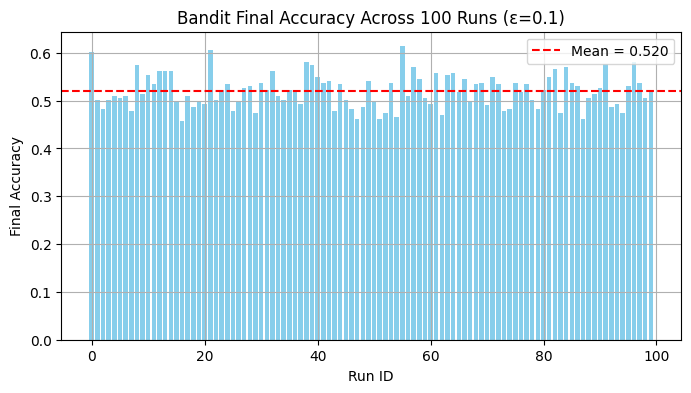

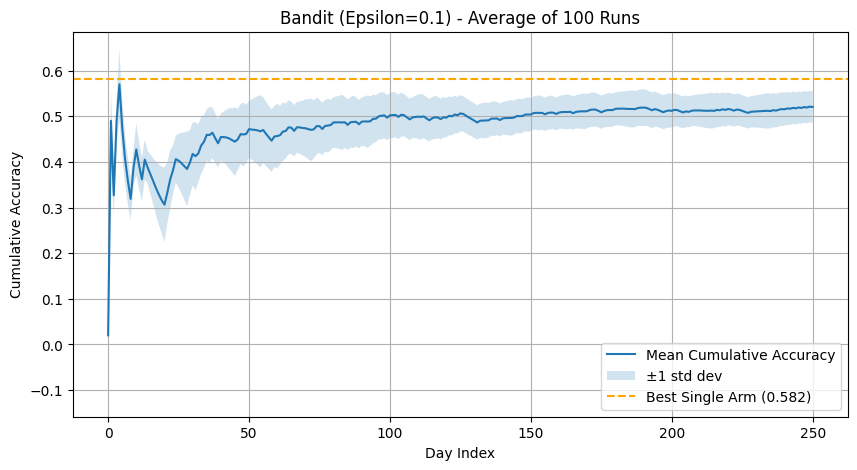

In [44]:
# ------------------------------------------------------------------------
# 3) PLOTS AT THE END
# ------------------------------------------------------------------------

# A) Bar chart of final accuracies across runs
plt.figure(figsize=(8,4))
plt.bar(x=np.arange(num_runs), height=all_final_acc, color='skyblue')
plt.axhline(mean_final_acc, color='red', linestyle='--', label=f'Mean = {mean_final_acc:.3f}')
plt.title(f"Bandit Final Accuracy Across {num_runs} Runs (ε={epsilon})")
plt.xlabel("Run ID")
plt.ylabel("Final Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# B) Average cumulative accuracy over time (±1 std)
mean_cum_acc = np.mean(all_cum_acc, axis=0)  # shape (num_days,)
std_cum_acc  = np.std(all_cum_acc, axis=0)
days = np.arange(num_days)

plt.figure(figsize=(10,5))
plt.plot(days, mean_cum_acc, label='Mean Cumulative Accuracy')
plt.fill_between(
    days,
    mean_cum_acc - std_cum_acc,
    mean_cum_acc + std_cum_acc,
    alpha=0.2, label='±1 std dev'
)
plt.axhline(best_single_acc, color='orange', linestyle='--', 
            label=f'Best Single Arm ({best_single_acc:.3f})')
plt.title(f"Bandit (Epsilon={epsilon}) - Average of {num_runs} Runs")
plt.xlabel("Day Index")
plt.ylabel("Cumulative Accuracy")
plt.legend()
plt.grid(True)
plt.show()

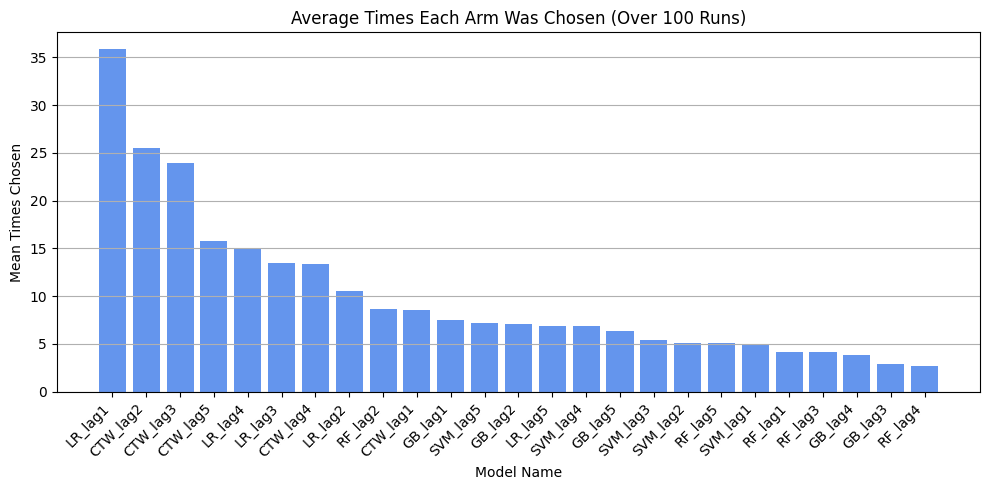

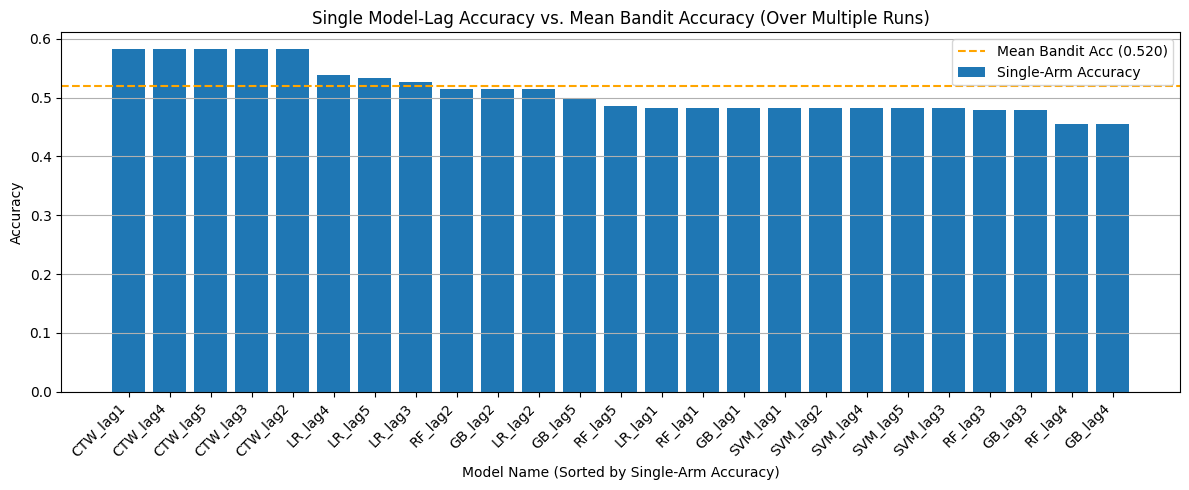


Done! Above are the aggregated results and plots over multiple runs.


In [45]:

# C) Average times chosen per arm (across runs), bar chart
mean_times_chosen = np.mean(all_times_chosen, axis=0)  # shape (num_arms,)

# We'll build a DataFrame so we can sort or label by model name
arm_freq_df = pd.DataFrame({
    'ModelName': model_names,
    'AvgTimesChosen': mean_times_chosen
})
arm_freq_df.sort_values(by='AvgTimesChosen', ascending=False, inplace=True)

plt.figure(figsize=(10,5))
plt.bar(arm_freq_df['ModelName'], arm_freq_df['AvgTimesChosen'], color='cornflowerblue')
plt.title(f"Average Times Each Arm Was Chosen (Over {num_runs} Runs)")
plt.xlabel("Model Name")
plt.ylabel("Mean Times Chosen")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# D) Single-Arm Accuracy vs. Mean Bandit Accuracy
sorted_acc_df = pd.DataFrame({
    'ModelName': model_names,
    'SingleArmAccuracy': single_arm_accuracies
}).sort_values(by='SingleArmAccuracy', ascending=False)

plt.figure(figsize=(12,5))
plt.bar(sorted_acc_df['ModelName'], sorted_acc_df['SingleArmAccuracy'], label='Single-Arm Accuracy')
plt.axhline(y=mean_final_acc, color='orange', linestyle='--', label=f'Mean Bandit Acc ({mean_final_acc:.3f})')
plt.title("Single Model-Lag Accuracy vs. Mean Bandit Accuracy (Over Multiple Runs)")
plt.xlabel("Model Name (Sorted by Single-Arm Accuracy)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nDone! Above are the aggregated results and plots over multiple runs.")

## **Exponentiel bandit** 

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import random

def run_exponential_bandit_once(all_predictions_test, y_test_full_aligned, model_names,
                                gamma=0.1, seed=None):
    """
    Runs one exponential-weighting (EXP3-style) multi-armed bandit session with named arms.
    
    Args:
        all_predictions_test (np.array): shape (num_days, num_arms) with predictions.
        y_test_full_aligned (np.array): true labels for each day.
        model_names (list): names for each arm/model.
        gamma (float): exploration parameter (0 <= gamma <= 1).
        seed (int): random seed for reproducibility.
    
    Returns:
        final_accuracy (float): overall average reward (accuracy) for this run.
        results_df (pd.DataFrame): day-by-day outcome including chosen arm and cumulative accuracy.
        summary_df (pd.DataFrame): per-arm statistics (times chosen, final bandit probability, single-arm accuracy).
        avg_reward (float): same as final_accuracy.
    """
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    
    num_days, num_arms = all_predictions_test.shape
    assert len(model_names) == num_arms, "model_names length must match number of arms!"
    
    # Initialize counts and weights for each arm
    counts = np.zeros(num_arms, dtype=int)
    weights = np.ones(num_arms, dtype=float)
    
    chosen_arms = []
    rewards = []
    
    # Day-by-day bandit loop
    for day_idx in range(num_days):
        # Compute probability distribution over arms using the EXP3 formula
        prob = (1 - gamma) * (weights / np.sum(weights)) + (gamma / num_arms)
        
        # Choose an arm based on the computed probabilities
        arm = np.random.choice(np.arange(num_arms), p=prob)
        chosen_arms.append(arm)
        
        # Get prediction and compute reward (1 if correct, else 0)
        chosen_pred = all_predictions_test[day_idx, arm]
        true_label = y_test_full_aligned[day_idx]
        reward = 1.0 if (chosen_pred == true_label) else 0.0
        rewards.append(reward)
        
        # Update counts for the chosen arm
        counts[arm] += 1
        
        # Importance-weighted reward estimate
        estimated_reward = reward / prob[arm]
        
        # Update the weight of the chosen arm exponentially
        weights[arm] *= np.exp((gamma / num_arms) * estimated_reward)
    
    rewards = np.array(rewards)
    final_accuracy = rewards.mean()
    
    # Build a day-by-day results DataFrame
    results_df = pd.DataFrame({
        'DayIndex': np.arange(num_days),
        'ChosenArmIndex': chosen_arms,
        'Reward': rewards
    })
    results_df['CumulativeCorrect'] = results_df['Reward'].cumsum()
    results_df['CumulativeAccuracy'] = results_df['CumulativeCorrect'] / (results_df.index + 1)
    
    # Compute single-arm accuracies (for reference, independent of the bandit)
    single_arm_acc = []
    for i in range(num_arms):
        arm_preds = all_predictions_test[:, i]
        acc = accuracy_score(y_test_full_aligned, arm_preds)
        single_arm_acc.append(acc)
    
    # Compute final bandit probabilities based on the last weights
    final_probabilities = (1 - gamma) * (weights / np.sum(weights)) + (gamma / num_arms)
    
    # Build summary DataFrame
    summary_df = pd.DataFrame({
        'ArmIndex': np.arange(num_arms),
        'ModelName': model_names,
        'TimesChosen': counts,
        'BanditProbability': final_probabilities,
        'SingleArmAccuracy': single_arm_acc
    })
    
    avg_reward = final_accuracy  # for convenience
    return final_accuracy, results_df, summary_df, avg_reward

# ------------------------------------------------------------------------
# Example usage:
# 1) Compute single-arm accuracies for reference
# ------------------------------------------------------------------------
# Assumes that 'all_predictions_test', 'y_test_full_aligned', and 'model_names' are already defined.
num_days, num_arms = all_predictions_test.shape
assert len(model_names) == num_arms, "model_names must match columns in all_predictions_test!"

single_arm_accuracies = []
for i in range(num_arms):
    col_preds = all_predictions_test[:, i]
    acc = accuracy_score(y_test_full_aligned, col_preds)
    single_arm_accuracies.append(acc)

best_single_acc = max(single_arm_accuracies)
print(f"Best single model-lag accuracy: {best_single_acc:.3f}")


num_runs = 100
gamma = 0.1  # exploration parameter for the EXP3 algorithm

all_final_acc = []
all_cum_acc = []
all_times_chosen = []  # we'll store 'TimesChosen' arrays to average later

for run_id in range(num_runs):
    seed = run_id  # for reproducibility across runs
    final_acc, results_df, summary_df, avg_reward = run_exponential_bandit_once(
        all_predictions_test,
        y_test_full_aligned,
        model_names,
        gamma=gamma,
        seed=seed
    )
    
    # Store final accuracy for this run
    all_final_acc.append(final_acc)
    
    # Store day-by-day cumulative accuracy
    cum_acc = results_df['CumulativeAccuracy'].values
    all_cum_acc.append(cum_acc)
    
    # Store times chosen for each arm
    all_times_chosen.append(summary_df['TimesChosen'].values)

all_final_acc = np.array(all_final_acc)       # shape (num_runs,)
all_cum_acc = np.array(all_cum_acc)           # shape (num_runs, num_days)
all_times_chosen = np.array(all_times_chosen) # shape (num_runs, num_arms)

# Summaries
mean_final_acc = np.mean(all_final_acc)
std_final_acc  = np.std(all_final_acc)

print(f"\nAfter {num_runs} runs (gamma={gamma}):")
print(f"Mean final accuracy:  {mean_final_acc:.3f} ± {std_final_acc:.3f}")


Best single model-lag accuracy: 0.582

After 100 runs (gamma=0.1):
Mean final accuracy:  0.508 ± 0.022


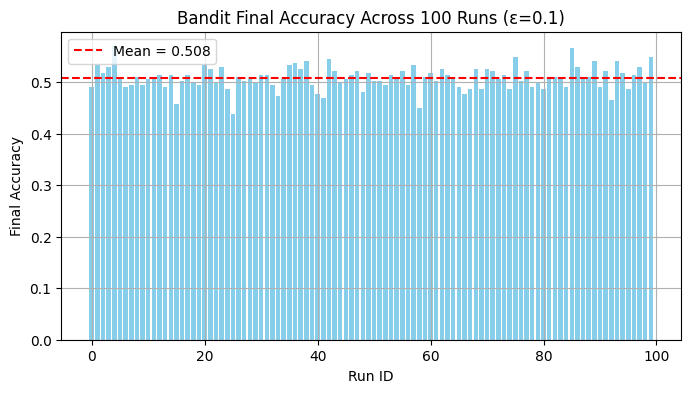

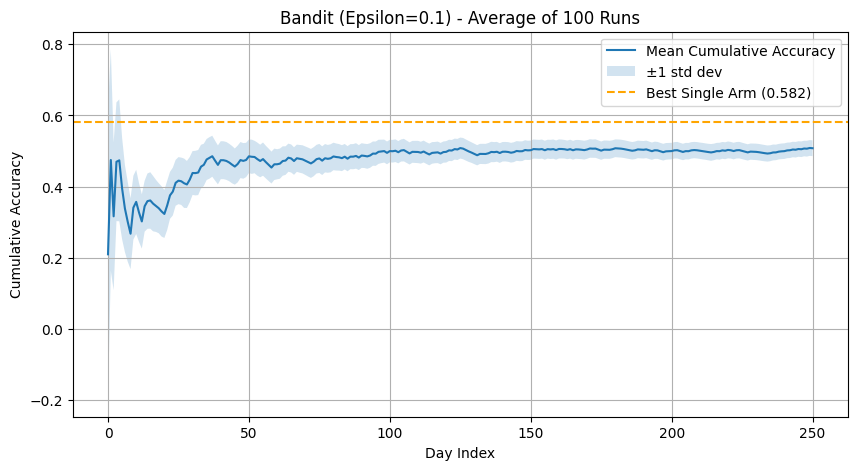

In [47]:
# ------------------------------------------------------------------------
# 3) PLOTS AT THE END
# ------------------------------------------------------------------------

# A) Bar chart of final accuracies across runs
plt.figure(figsize=(8,4))
plt.bar(x=np.arange(num_runs), height=all_final_acc, color='skyblue')
plt.axhline(mean_final_acc, color='red', linestyle='--', label=f'Mean = {mean_final_acc:.3f}')
plt.title(f"Bandit Final Accuracy Across {num_runs} Runs (ε={epsilon})")
plt.xlabel("Run ID")
plt.ylabel("Final Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# B) Average cumulative accuracy over time (±1 std)
mean_cum_acc = np.mean(all_cum_acc, axis=0)  # shape (num_days,)
std_cum_acc  = np.std(all_cum_acc, axis=0)
days = np.arange(num_days)

plt.figure(figsize=(10,5))
plt.plot(days, mean_cum_acc, label='Mean Cumulative Accuracy')
plt.fill_between(
    days,
    mean_cum_acc - std_cum_acc,
    mean_cum_acc + std_cum_acc,
    alpha=0.2, label='±1 std dev'
)
plt.axhline(best_single_acc, color='orange', linestyle='--', 
            label=f'Best Single Arm ({best_single_acc:.3f})')
plt.title(f"Bandit (Epsilon={epsilon}) - Average of {num_runs} Runs")
plt.xlabel("Day Index")
plt.ylabel("Cumulative Accuracy")
plt.legend()
plt.grid(True)
plt.show()